In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
sns.set()

The Indian cropping season is classified into two main seasons-(i) Kharif and (ii) Rabi based on the monsoon. 

The kharif cropping season is from July–October (4 Months) during the south-west monsoon and the Rabi cropping season is from October-March (winter) (6 Months). 
The crops grown between March and June are Summer crops (4 months). 

Pakistan and Bangladesh are two other countries that are using the term ‘kharif’ and ‘rabi’ to describe about their cropping patterns. 

The terms ‘kharif’ and ‘rabi’ originate from Arabic language where Kharif means autumn and Rabi means spring.

The kharif crops include rice, maize, sorghum, pearl millet/bajra, finger millet/ragi (cereals), arhar (pulses), soyabean, groundnut (oilseeds), cotton etc. 

The rabi crops include wheat, barley, oats (cereals), chickpea/gram (pulses), linseed, mustard (oilseeds) etc.

The summer crops are snap bean, corn, cucumbers, melons, peppers, tomatoes, etc.

The autumn crops are spinach, snowpeas, carrots, radish, broccoli, cauliflower, beetroot, etc.

The Whole year crops, tomatoes, pepper, eggplant, horseradish, etc.

The rainfall is calculated in terms of mm.

In [2]:
a_train = pd.read_csv('Copy of Training Dataset Capstone.csv')

In [3]:
a_train.shape

(186839, 12)

In [4]:
a_test = pd.read_csv('Copy of Testing Dataset Capstone.csv')

In [5]:
a_test.shape

(59252, 12)

In [6]:
agri = pd.merge(a_train,a_test, how = "outer")

In [7]:
agri.shape

(246091, 12)

In [8]:
agri.head()

,State Name,City Name,Crop_Year,Season,Crop Name,Area,Production,Rain Fall,Production per Area,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low)
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,604.2,1.5949,Medium,Low,Low
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,604.2,0.5000,High,High,Moderate
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,604.2,3.1471,Low,Low,Low
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,1381.6,3.6420,Low,Low,Low
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,1381.6,0.2292,High,High,Moderate


In [9]:
agri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246091 entries, 0 to 246090
Data columns (total 12 columns):
State Name                        246091 non-null object
City Name                         246091 non-null object
Crop_Year                         246091 non-null int64
Season                            246091 non-null object
Crop Name                         246091 non-null object
Area                              246091 non-null float64
Production                        242361 non-null float64
Rain Fall                         245854 non-null float64
Production
per Area               246091 non-null float64
Input Cost
(High/Medium/Low)      246091 non-null object
Market Price
(High/Medium/Low)    246091 non-null object
Return
(High/Moderate/Low)        246091 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 24.4+ MB


In [10]:
agri.isnull().sum()

State Name                            0
City Name                             0
Crop_Year                             0
Season                                0
Crop Name                             0
Area                                  0
Production                         3730
Rain Fall                           237
Production\nper Area                  0
Input Cost\n(High/Medium/Low)         0
Market Price\n(High/Medium/Low)       0
Return\n(High/Moderate/Low)           0
dtype: int64

In [11]:
agri.describe().T
# mean is less than median in crop_year, area and production.
# median is less than mean for rain fall and production per area which could be because of level of maintainance/upkeep and weather conditions respectively.

,count,mean,std,min,25%,50%,75%,max
Crop_Year,246091.0,2005.643018,4.952164e+00,1997.000,2002.0,2006.0,2010.0000,2.015000e+03
Area,246091.0,12002.820864,5.052340e+04,0.040,80.0,582.0,4392.0000,8.580100e+06
Production,242361.0,582503.442251,1.706581e+07,0.000,88.0,729.0,7023.0000,1.250800e+09
Rain Fall,245854.0,936.851313,8.619939e+02,-72.554,450.8,765.6,1082.3960,9.721800e+03
Production\nper Area,246091.0,41.017785,8.113691e+02,0.000,0.5,1.0,2.3124,8.800000e+04


In [12]:
agri.columns

Index(['State Name', 'City Name', 'Crop_Year', 'Season', 'Crop Name', 'Area',
       'Production', 'Rain Fall', 'Production\nper Area',
       'Input Cost\n(High/Medium/Low)', 'Market Price\n(High/Medium/Low)',
       'Return\n(High/Moderate/Low)'],
      dtype='object')

In [13]:
agri.Crop_Year.value_counts()
# highest records for the year 2003 and lowest for 2015.

2003    17287
2002    16671
2008    14550
2007    14526
2006    14328
2004    14117
2009    14116
2011    14071
2010    14065
2005    13799
2000    13658
2013    13650
2012    13410
2001    13361
1999    12515
1998    11533
2014    10973
1997     8899
2015      562
Name: Crop_Year, dtype: int64

In [14]:
agri.Crop_Year.unique
# there are 246090 unique entries for Crop_Year in which last unique value is that for the year 2014

<bound method Series.unique of 0         2000
1         2000
2         2000
3         2000
4         2000
5         2000
6         2000
7         2000
8         2000
9         2000
10        2001
11        2001
12        2001
13        2001
14        2001
15        2001
16        2001
17        2001
18        2002
19        2002
20        2002
21        2002
22        2002
23        2002
24        2002
25        2002
26        2002
27        2003
28        2003
29        2003
          ... 
246061    1997
246062    1998
246063    1999
246064    1999
246065    1999
246066    2000
246067    2001
246068    2002
246069    2002
246070    2002
246071    2003
246072    2004
246073    2005
246074    2006
246075    2007
246076    2007
246077    2008
246078    2008
246079    2009
246080    2009
246081    2010
246082    2010
246083    2011
246084    2011
246085    2012
246086    2012
246087    2013
246088    2013
246089    2014
246090    2014
Name: Crop_Year, Length: 246091, dtype: int64>

In [15]:
agri.Production.value_counts()
# unable to comprehend, the scale/value of production.

1.0         4028
0.0         3523
100.0       3521
2.0         2964
3.0         2311
4.0         1933
200.0       1856
5.0         1745
6.0         1586
10.0        1566
300.0       1323
7.0         1307
9.0         1160
8.0         1155
20.0        1095
11.0        1005
400.0        959
12.0         947
14.0         912
13.0         911
1000.0       902
15.0         807
30.0         806
17.0         791
500.0        746
18.0         744
40.0         737
16.0         732
19.0         712
22.0         654
            ... 
60140.0        1
84572.0        1
104543.0       1
169122.0       1
249600.0       1
486000.0       1
17582.0        1
612968.0       1
169117.0       1
169143.0       1
81236.0        1
32673.0        1
107.6          1
469457.0       1
117364.0       1
42297.0        1
84591.0        1
42295.0        1
135360.0       1
21147.0        1
10573.0        1
234686.0       1
117351.0       1
58673.0        1
19883.0        1
84577.0        1
222124.0       1
6544.0        

In [16]:
agri.Production.unique
# there are 246090 unique entries for Production

<bound method Series.unique of 0             2000.00
1                1.00
2              321.00
3              641.00
4              165.00
5         65100000.00
6              100.00
7                2.00
8               15.00
9              169.00
10            2061.00
11               1.00
12             300.00
13             192.00
14        64430000.00
15             100.00
16               1.00
17              33.00
18             510.84
19            2083.00
20            1278.00
21              13.50
22             208.00
23        67490000.00
24              28.80
25             133.00
26              40.00
27              90.17
28            1525.00
29            1763.00
             ...     
246061      595830.00
246062      336300.00
246063       18265.00
246064      535580.00
246065         170.00
246066      469910.00
246067      735730.00
246068       25782.00
246069      482579.00
246070         758.00
246071      632908.00
246072      669276.00
246073      524587.00
2

In [17]:
agri.Area.value_counts()
# unable to comprehend, the scale/dimension of area.

1.00         4553
2.00         3453
100.00       2824
3.00         2636
4.00         2273
5.00         2176
6.00         1830
200.00       1703
10.00        1630
7.00         1620
8.00         1461
9.00         1273
20.00        1259
300.00       1217
12.00        1195
11.00        1176
15.00        1119
1000.00      1108
13.00        1042
400.00        974
14.00         974
16.00         958
30.00         913
17.00         902
18.00         888
19.00         810
25.00         807
500.00        803
40.00         790
21.00         780
             ... 
29255.00        1
336853.00       1
42106.00        1
17597.00        1
84191.00        1
99200.00        1
84177.00        1
9794.00         1
21045.00        1
116951.00       1
14619.00        1
3387.86         1
116956.00       1
7166.00         1
14453.00        1
84190.00        1
21049.00        1
38280.00        1
58483.00        1
128432.00       1
20830.00        1
110368.00       1
252800.00       1
12954.00        1
31498.00  

In [18]:
agri.Area.unique
# there are 246090 unique entries for area.

<bound method Series.unique of 0           1254.0
1              2.0
2            102.0
3            176.0
4            720.0
5          18168.0
6             36.0
7              1.0
8              5.0
9             40.0
10          1254.0
11             2.0
12            83.0
13           719.0
14         18190.0
15            46.0
16             1.0
17            11.0
18           189.2
19          1258.0
20           213.0
21            63.0
22           719.0
23         18240.0
24           413.0
25            47.3
26             5.0
27            52.0
28          1261.0
29           266.0
            ...   
246061    315095.0
246062    227172.0
246063      1379.0
246064    294107.0
246065       500.0
246066    258531.0
246067    290378.0
246068      1485.0
246069    228204.0
246070      1155.0
246071    290796.0
246072    287528.0
246073    264150.0
246074    277234.0
246075    308632.0
246076       233.0
246077    297872.0
246078       261.0
246079    265107.0
246080       238.0


In [19]:
agri['Rain Fall'].value_counts()
# unable to comprehend, level of rainfall 348.5 is recorded highest whereas level of rainfall 1439.2 is recorded the lowest.

348.500     15132
926.500      8368
200.100      6554
741.900      5829
394.800      5075
464.600      4578
358.200      4483
450.800      2831
495.400      2387
598.500      1424
930.000       945
901.400       933
760.900       900
816.000       885
1223.690      735
1176.500      726
733.338       690
2502.734      630
1092.844      630
1849.289      615
731.460       585
1838.713      585
450.100       584
2220.431      570
829.109       546
757.029       540
1144.839      540
359.600       529
687.500       525
781.335       525
            ...  
767.800         1
1753.600        1
900.700         1
1496.300        1
1057.200        1
1387.200        1
383.640         1
451.100         1
73.700          1
87.200          1
43.200          1
588.200         1
13.100          1
247.100         1
829.400         1
79.591          1
197.200         1
53.400          1
54.299          1
1147.800        1
1418.900        1
786.120         1
1108.800        1
800.300         1
295.789   

In [20]:
agri['Rain Fall'].unique
# there are 246090 unbique entries.

<bound method Series.unique of 0          604.200
1          604.200
2          604.200
3         1381.600
4         1381.600
5         1381.600
6         1381.600
7         1381.600
8         1381.600
9         1381.600
10         706.150
11         706.150
12         706.150
13        1540.450
14        1540.450
15        1540.450
16        1540.450
17        1540.450
18         668.100
19        1310.100
20        1310.100
21        1310.100
22        1310.100
23        1310.100
24        1310.100
25        1310.100
26        1310.100
27         778.300
28        1177.950
29        1177.950
            ...   
246061      72.500
246062      72.500
246063      60.300
246064      60.300
246065      60.300
246066      60.300
246067      60.300
246068      60.300
246069      60.300
246070      75.299
246071     115.646
246072      28.290
246073      28.290
246074      28.290
246075      79.849
246076      22.514
246077      62.536
246078      62.536
246079      62.536
246080      17.000


In [21]:
agri['Production\nper Area'].value_counts()
# zero production\nper Area is recorded highest whereas 38.3782 is recorded only once.

0.0000     7261
1.0000     7096
0.5000     4051
0.3333     1887
2.0000     1675
0.6667     1472
0.2500     1068
0.4000     1054
1.5000     1004
0.6000      985
0.7500      902
3.0000      853
0.8000      767
0.2000      675
1.3333      506
0.8333      494
5.0000      470
0.5714      440
1.2000      424
0.2857      418
0.4286      414
4.0000      382
1.2500      371
1.6667      366
0.1667      356
0.7143      348
2.5000      346
0.3000      345
0.6250      332
0.3750      331
           ... 
22.8103       1
5.5496        1
6.3170        1
14.5345       1
16.4663       1
22.0540       1
8.7736        1
7.1244        1
38.3782       1
7.5642        1
3.0963        1
10.7330       1
4.7704        1
2.9484        1
19.7894       1
23.1939       1
2.8961        1
3.2286        1
91.8394       1
6.5841        1
4.6356        1
22.3852       1
5.6497        1
5.5251        1
12.3991       1
7.8065        1
4.2100        1
12.2903       1
18.3688       1
3.6780        1
Name: Production\nper Ar

In [22]:
agri['Production\nper Area'].unique
# there are 246090 unique entries for production per area.

<bound method Series.unique of 0            1.5949
1            0.5000
2            3.1471
3            3.6420
4            0.2292
5         3583.2232
6            2.7778
7            2.0000
8            3.0000
9            4.2250
10           1.6435
11           0.5000
12           3.6145
13           0.2670
14        3542.0561
15           2.1739
16           1.0000
17           3.0000
18           2.7000
19           1.6558
20           6.0000
21           0.2143
22           0.2893
23        3700.1096
24           0.0697
25           2.8118
26           8.0000
27           1.7340
28           1.2094
29           6.6278
            ...    
246061       1.8910
246062       1.4804
246063      13.2451
246064       1.8210
246065       0.3400
246066       1.8176
246067       2.5337
246068      17.3616
246069       2.1147
246070       0.6563
246071       2.1765
246072       2.3277
246073       1.9859
246074       2.6154
246075       2.4623
246076       0.3991
246077       2.4781
246078   

In [23]:
agri.columns

Index(['State Name', 'City Name', 'Crop_Year', 'Season', 'Crop Name', 'Area',
       'Production', 'Rain Fall', 'Production\nper Area',
       'Input Cost\n(High/Medium/Low)', 'Market Price\n(High/Medium/Low)',
       'Return\n(High/Moderate/Low)'],
      dtype='object')

In [24]:
agri['State Name'].value_counts()

Uttar Pradesh                  33306
Madhya Pradesh                 22943
Karnataka                      21122
Bihar                          18885
Assam                          14628
Odisha                         13575
Tamil Nadu                     13547
Maharashtra                    12628
Rajasthan                      12514
Chhattisgarh                   10709
Andhra Pradesh                  9628
West Bengal                     9613
Gujarat                         8436
Haryana                         5875
Telangana                       5649
Uttarakhand                     4896
Kerala                          4261
Nagaland                        3906
Punjab                          3173
Meghalaya                       2867
Arunachal Pradesh               2546
Himachal Pradesh                2494
Jammu and Kashmir               1634
Tripura                         1412
Manipur                         1267
Jharkhand                       1266
Mizoram                          957
P

In [25]:
agri['State Name'].unique

<bound method Series.unique of 0         Andaman and Nicobar Islands
1         Andaman and Nicobar Islands
2         Andaman and Nicobar Islands
3         Andaman and Nicobar Islands
4         Andaman and Nicobar Islands
5         Andaman and Nicobar Islands
6         Andaman and Nicobar Islands
7         Andaman and Nicobar Islands
8         Andaman and Nicobar Islands
9         Andaman and Nicobar Islands
10        Andaman and Nicobar Islands
11        Andaman and Nicobar Islands
12        Andaman and Nicobar Islands
13        Andaman and Nicobar Islands
14        Andaman and Nicobar Islands
15        Andaman and Nicobar Islands
16        Andaman and Nicobar Islands
17        Andaman and Nicobar Islands
18        Andaman and Nicobar Islands
19        Andaman and Nicobar Islands
20        Andaman and Nicobar Islands
21        Andaman and Nicobar Islands
22        Andaman and Nicobar Islands
23        Andaman and Nicobar Islands
24        Andaman and Nicobar Islands
25        Andaman a

In [26]:
agri['City Name'].value_counts()
# bijapur has the highest no. of records and mumbai has the lowest no.of records. 

BIJAPUR                     945
TUMKUR                      936
BELGAUM                     925
HASSAN                      895
BELLARY                     887
DAVANGERE                   886
AURANGABAD                  879
HAVERI                      870
CHAMARAJANAGAR              844
CHITRADURGA                 840
GULBARGA                    833
MYSORE                      832
KURNOOL                     828
DHARWAD                     825
SHIMOGA                     825
KADAPA                      824
CHIKMAGALUR                 820
BILASPUR                    815
VISAKHAPATANAM              812
PRAKASAM                    808
BANGALORE RURAL             794
CHITTOOR                    789
ANANTAPUR                   788
BIDAR                       781
MANDYA                      780
EAST GODAVARI               765
GADAG                       755
VIZIANAGARAM                741
BAGALKOT                    733
MEDAK                       714
                           ... 
DEOGHAR 

In [27]:
agri['City Name'].unique
# there are 246090 unique records, in the end it is Purulia.

<bound method Series.unique of 0         NICOBARS
1         NICOBARS
2         NICOBARS
3         NICOBARS
4         NICOBARS
5         NICOBARS
6         NICOBARS
7         NICOBARS
8         NICOBARS
9         NICOBARS
10        NICOBARS
11        NICOBARS
12        NICOBARS
13        NICOBARS
14        NICOBARS
15        NICOBARS
16        NICOBARS
17        NICOBARS
18        NICOBARS
19        NICOBARS
20        NICOBARS
21        NICOBARS
22        NICOBARS
23        NICOBARS
24        NICOBARS
25        NICOBARS
26        NICOBARS
27        NICOBARS
28        NICOBARS
29        NICOBARS
            ...   
246061     PURULIA
246062     PURULIA
246063     PURULIA
246064     PURULIA
246065     PURULIA
246066     PURULIA
246067     PURULIA
246068     PURULIA
246069     PURULIA
246070     PURULIA
246071     PURULIA
246072     PURULIA
246073     PURULIA
246074     PURULIA
246075     PURULIA
246076     PURULIA
246077     PURULIA
246078     PURULIA
246079     PURULIA
246080     PURULIA


In [28]:
agri.Season.value_counts()
# highest no. of records are that of kharif season with the least no. of records are of autumn season.

Kharif         95951
Rabi           66987
Whole Year     57305
Summer         14841
Winter          6058
Autumn          4949
Name: Season, dtype: int64

In [29]:
agri.Season.unique
# there are 246090 unique records with winter records bring in the last.

<bound method Series.unique of 0         Kharif     
1         Kharif     
2         Kharif     
3         Whole Year 
4         Whole Year 
5         Whole Year 
6         Whole Year 
7         Whole Year 
8         Whole Year 
9         Whole Year 
10        Kharif     
11        Kharif     
12        Kharif     
13        Whole Year 
14        Whole Year 
15        Whole Year 
16        Whole Year 
17        Whole Year 
18        Kharif     
19        Whole Year 
20        Whole Year 
21        Whole Year 
22        Whole Year 
23        Whole Year 
24        Whole Year 
25        Whole Year 
26        Whole Year 
27        Kharif     
28        Whole Year 
29        Whole Year 
             ...     
246061    Winter     
246062    Winter     
246063    Winter     
246064    Winter     
246065    Winter     
246066    Winter     
246067    Winter     
246068    Winter     
246069    Winter     
246070    Winter     
246071    Winter     
246072    Winter     
246073    Winter     
2

In [30]:
agri['Crop Name'].value_counts()
# rice crop has no. of records while dry fruits have the lowest.

Rice                     15104
Maize                    13947
Moong(Green Gram)        10318
Urad                      9850
Sesamum                   9046
Groundnut                 8834
Sugarcane                 7921
Wheat                     7899
Rapeseed &Mustard         7592
Arhar/Tur                 7578
Gram                      7361
Jowar                     7065
Onion                     7012
Potato                    6931
Dry chillies              6489
Sunflower                 5571
Bajra                     5427
Small millets             4652
Peas & beans (Pulses)     4524
Cotton(lint)              4518
Linseed                   4405
Masoor                    4224
Turmeric                  4202
Barley                    4199
Sweet potato              4198
Ragi                      4145
Horse-gram                3902
Other Kharif pulses       3659
Castor seed               3376
Coriander                 3369
                         ...  
Ribed Guard                 38
Yam     

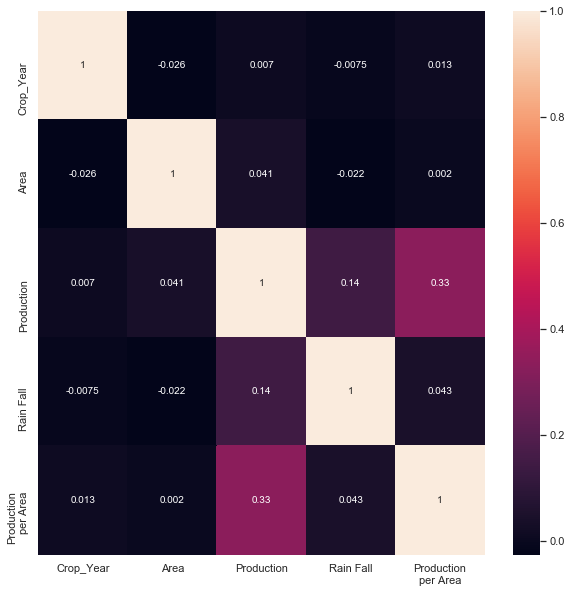

In [31]:
plt.figure(figsize = (10,10))
sns.heatmap(agri.corr(), annot = True)
plt.show()

In [32]:
agri['Input Cost\n(High/Medium/Low)'].value_counts()
# input cost for medium category is the highest and for high category lowest.

Medium    114792
Low        68558
High       62741
Name: Input Cost\n(High/Medium/Low), dtype: int64

In [33]:
agri['Market Price\n(High/Medium/Low)'].value_counts()
# the market price for medium category is the highest whereas lowest for the highest category.

Medium    96119
Low       87231
High      62741
Name: Market Price\n(High/Medium/Low), dtype: int64

In [34]:
agri['Return\n(High/Moderate/Low)'].value_counts()
# there are only two categories moderate and low, clearly moderate has higher no. of returns.

Moderate    158859
Low          87232
Name: Return\n(High/Moderate/Low), dtype: int64

#### Univariate Analysis

In [35]:
agri.columns

Index(['State Name', 'City Name', 'Crop_Year', 'Season', 'Crop Name', 'Area',
       'Production', 'Rain Fall', 'Production\nper Area',
       'Input Cost\n(High/Medium/Low)', 'Market Price\n(High/Medium/Low)',
       'Return\n(High/Moderate/Low)'],
      dtype='object')

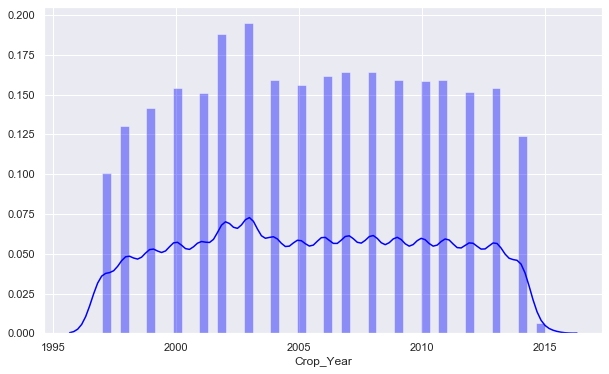

In [36]:
# numerical
plt.figure(figsize = (10,6))
sns.distplot(agri['Crop_Year'], color = 'blue')
plt.show()
# there seems to ba uniform distribution in terms of crop year.
# However we can see that between 2000 and 2005, year 2002 and 2003 has the highest % crops.

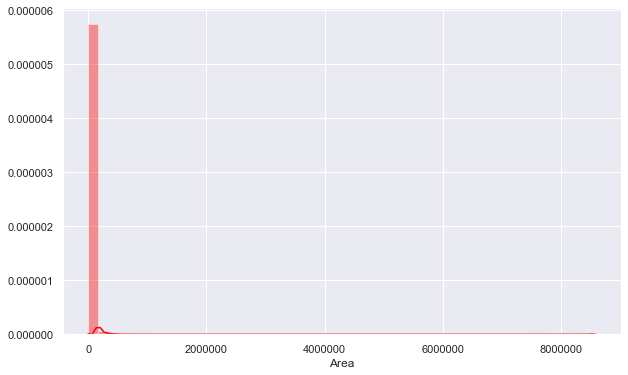

In [37]:
# numerical
plt.figure(figsize = (10,6))
sns.distplot(agri['Area'], color = 'red')
plt.show()
# the data is highly right skewed.
# the crop area is very close to zero but than that.

C:\Users\ADITYA GUPTA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\ADITYA GUPTA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


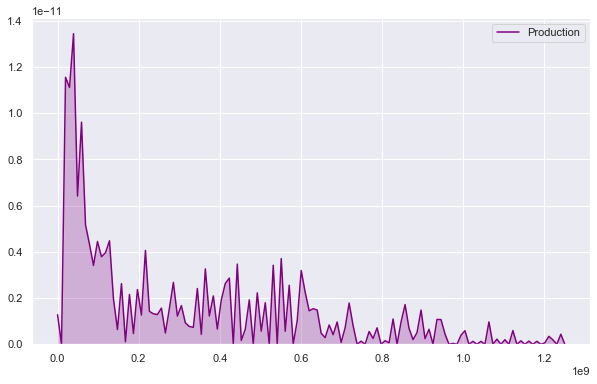

In [38]:
# numerical
plt.figure(figsize = (10,6))
sns.kdeplot(agri['Production'], shade=True, color = 'purple')
plt.show()
# the data is highly right skewed.

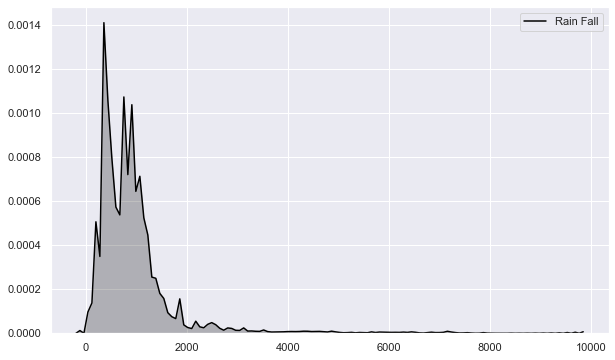

In [39]:
# numerical
plt.figure(figsize = (10,6))
sns.kdeplot(agri['Rain Fall'], shade=True, color = 'black')
plt.show()
# THe data is highly right skewed.
# The hihgest recorded data is 1489.2 mm depth of rain fall.

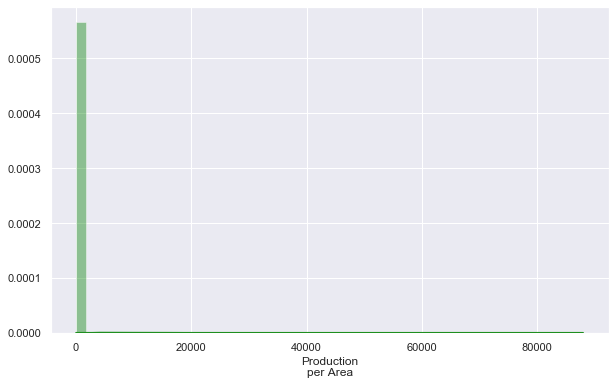

In [40]:
# numerical
plt.figure(figsize = (10,6))
sns.distplot(agri['Production\nper Area'], color = 'green')
plt.show()
# the data for production per area is highly right skewed.
# the values are close to zero.

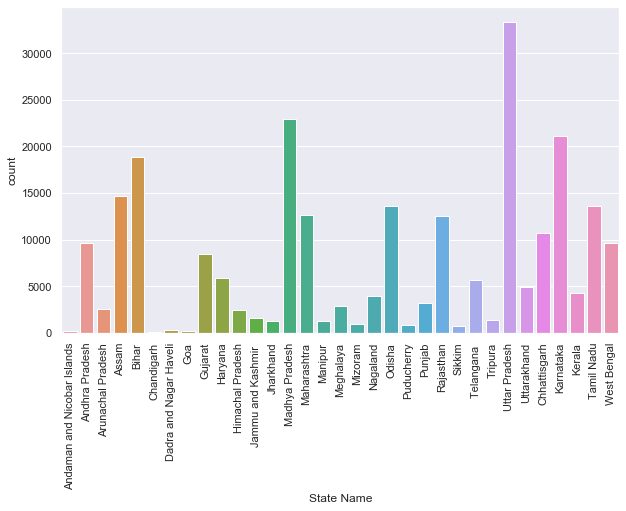

In [41]:
# catagorical
plt.figure(figsize = (10,6))
sns.countplot(x = "State Name", data = agri)
plt.xticks(rotation = 90)
plt.show()
# State U.P. has highest no. of records while lowest no. of records in chandigarh.

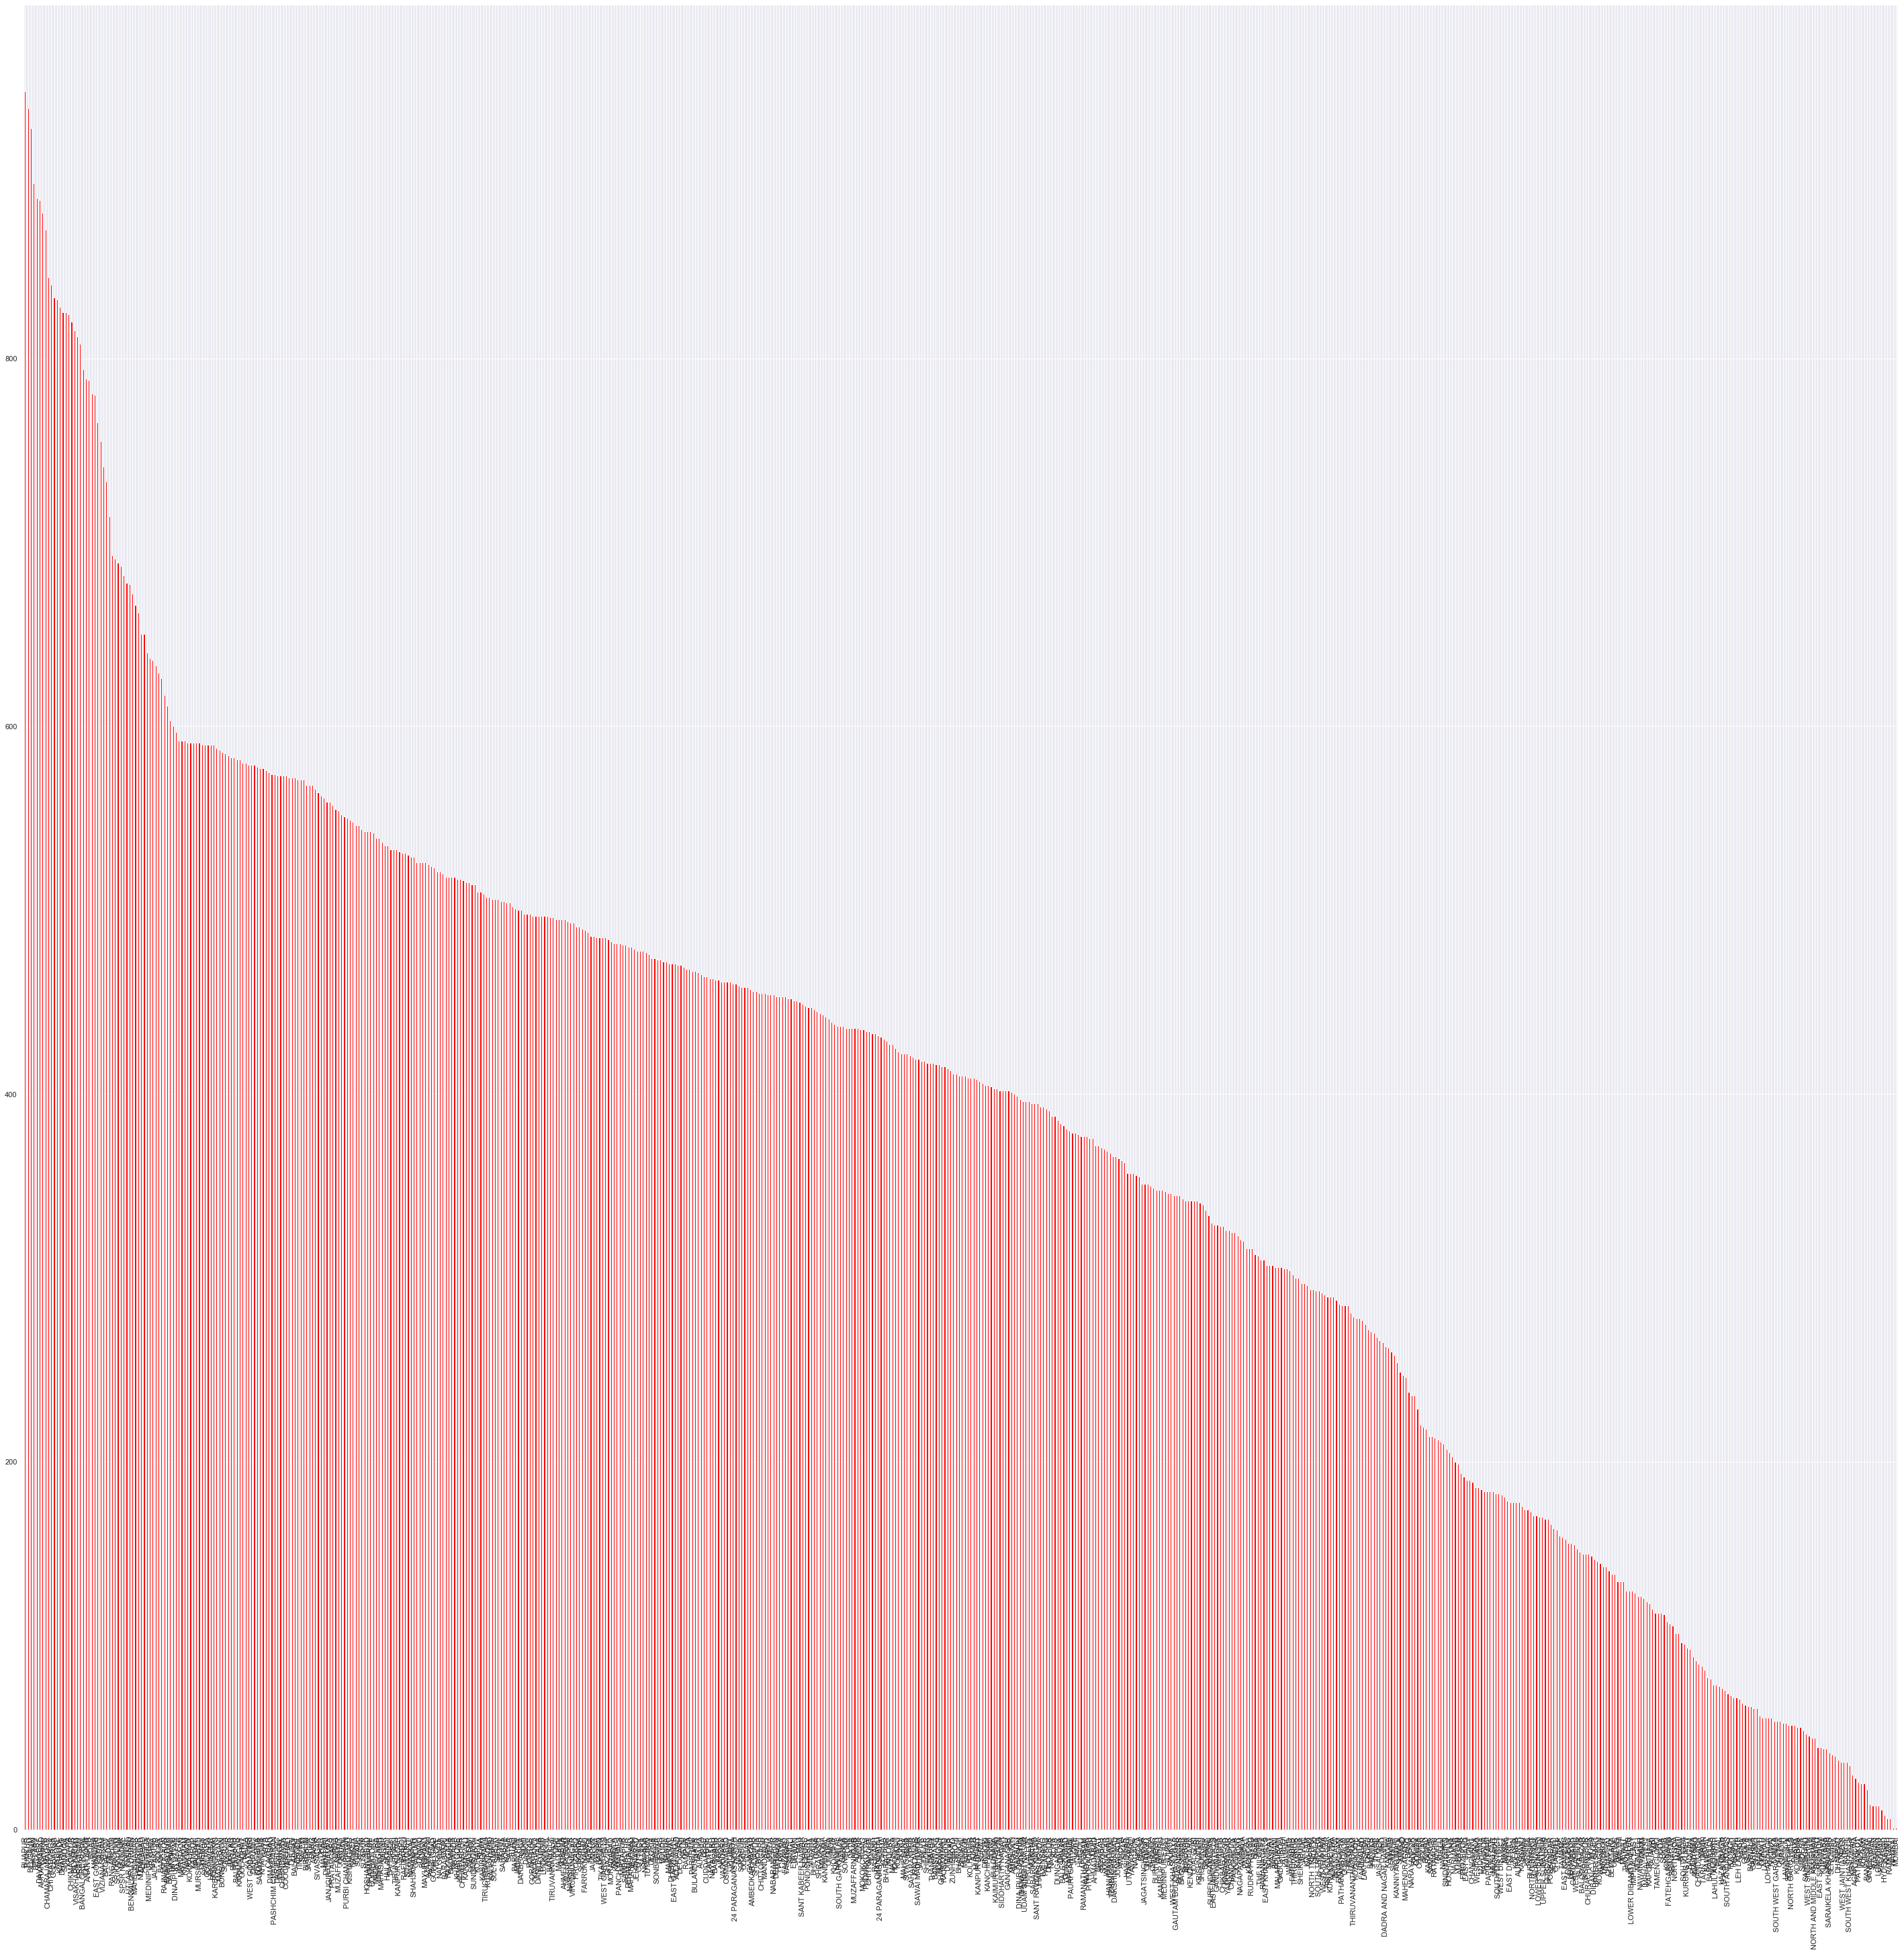

In [42]:
# catagorical
plt.figure(figsize = (50,50))
agri['City Name'].value_counts().plot(kind = 'bar', color = 'red')
plt.show()
# this is right skewed data.

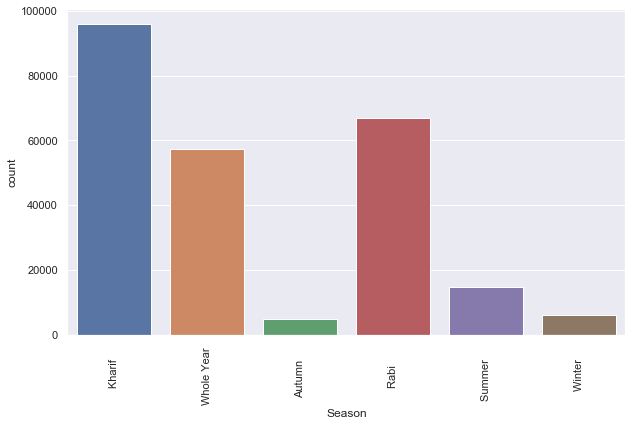

In [43]:
# catagorical
plt.figure(figsize = (10,6))
sns.countplot(x = "Season", data = agri)
plt.xticks(rotation = 90)
plt.show()
# kharif season has the highest no. of records for crops, while autumn has the lowest.

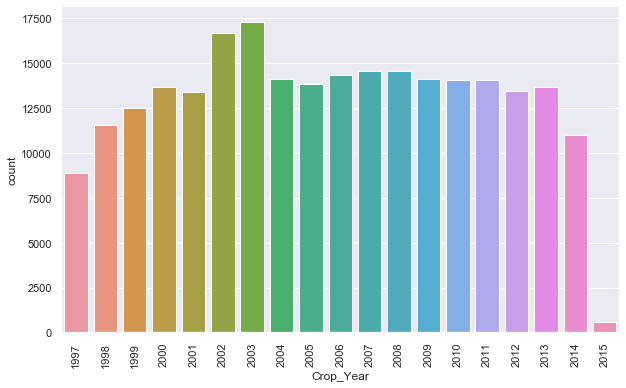

In [44]:
# catagorical
plt.figure(figsize = (10,6))
sns.countplot(x = "Crop_Year", data = agri)
plt.xticks(rotation = 90)
plt.show()
# 2015 has very less data while 2002 & 2003 has the highest records.

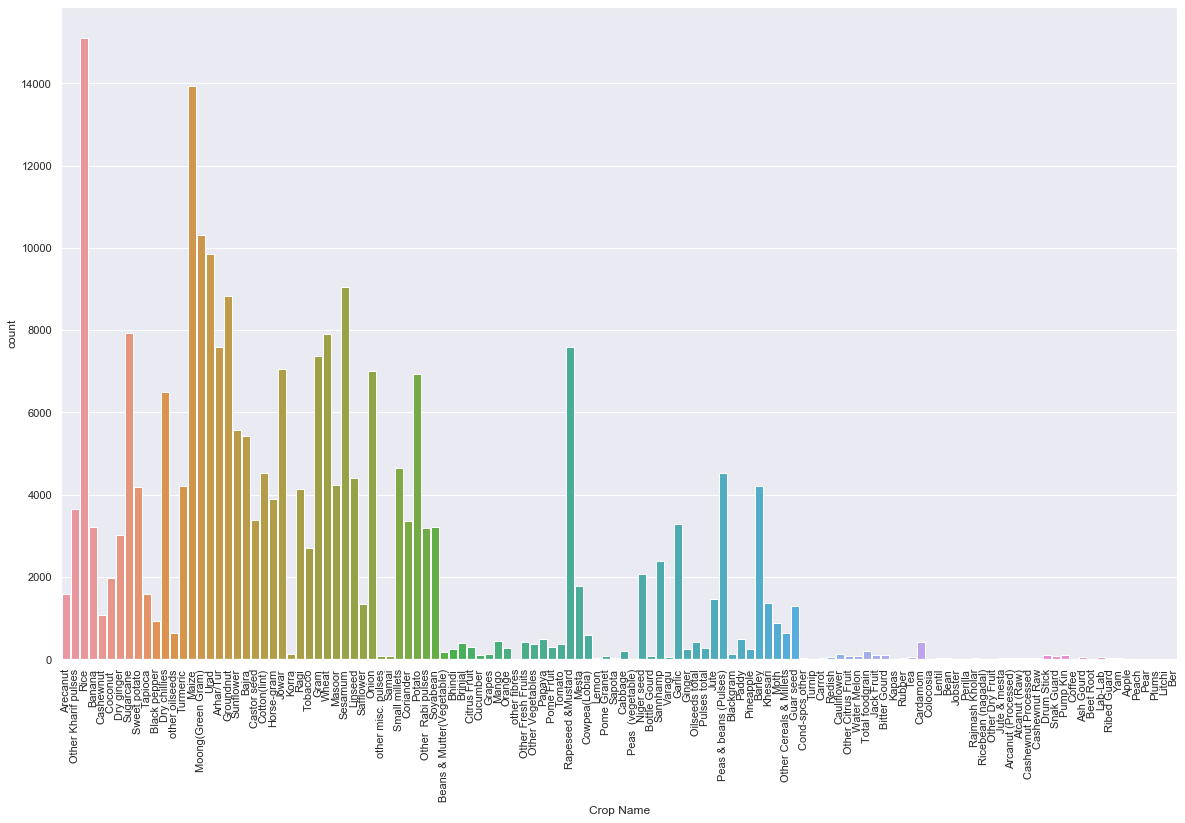

In [45]:
# catagorical
plt.figure(figsize = (20,12))
sns.countplot(x = 'Crop Name', data = agri)
plt.xticks(rotation = 90)
plt.show()

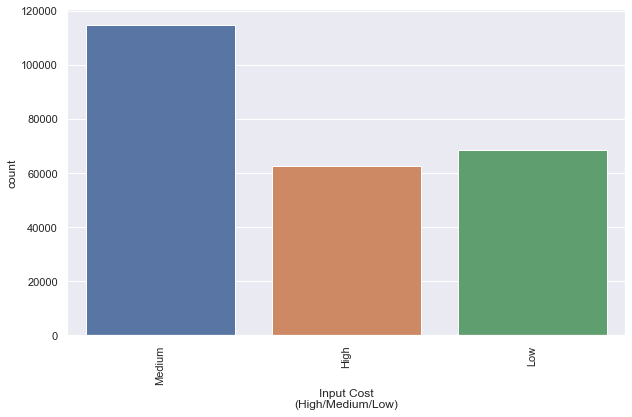

In [46]:
# catagorical   'Input Cost\n(High/Medium/Low)', 'Market Price\n(High/Medium/Low)','Return\n(High/Moderate/Low)'
plt.figure(figsize = (10,6))
sns.countplot(x = 'Input Cost\n(High/Medium/Low)', data = agri)
plt.xticks(rotation = 90)
plt.show()
# Medium category has the no. of records.

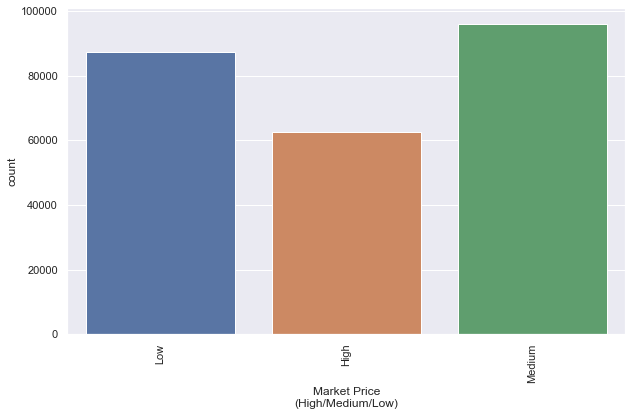

In [47]:
# catagorical   'Input Cost\n(High/Medium/Low)', 'Market Price\n(High/Medium/Low)','Return\n(High/Moderate/Low)'
plt.figure(figsize = (10,6))
sns.countplot(x = 'Market Price\n(High/Medium/Low)', data = agri)
plt.xticks(rotation = 90)
plt.show()
# Medium category has the highest market price

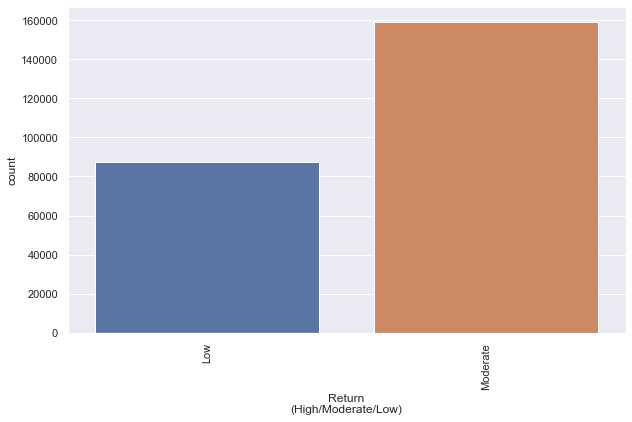

In [48]:
# catagorical   'Input Cost\n(High/Medium/Low)', 'Market Price\n(High/Medium/Low)','Return\n(High/Moderate/Low)'
plt.figure(figsize = (10,6))
sns.countplot(x = 'Return\n(High/Moderate/Low)', data = agri)
plt.xticks(rotation = 90)
plt.show()
# moderate category has the highest return.

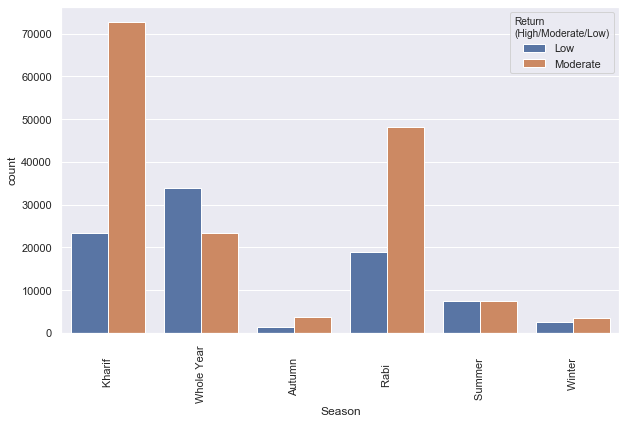

In [49]:
# catagorical   'Input Cost\n(High/Medium/Low)', 'Market Price\n(High/Medium/Low)','Return\n(High/Moderate/Low)'
plt.figure(figsize = (10,6))
sns.countplot(x = 'Season', hue = 'Return\n(High/Moderate/Low)', data = agri)
plt.xticks(rotation = 90)
plt.show()

#### Bivariate Analysis

In [50]:
agri.columns

Index(['State Name', 'City Name', 'Crop_Year', 'Season', 'Crop Name', 'Area',
       'Production', 'Rain Fall', 'Production\nper Area',
       'Input Cost\n(High/Medium/Low)', 'Market Price\n(High/Medium/Low)',
       'Return\n(High/Moderate/Low)'],
      dtype='object')

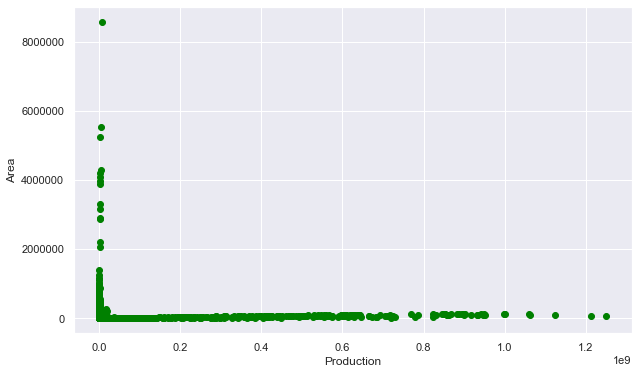

In [51]:
# Scatter Plot (Numerical & Numerical)
plt.figure(figsize = [10,6])
plt.scatter(agri.Production , agri.Area , color = 'green')
plt.xlabel('Production')
plt.ylabel('Area')
plt.show()
# With increase in area, production has remain steady and gradually increased. 

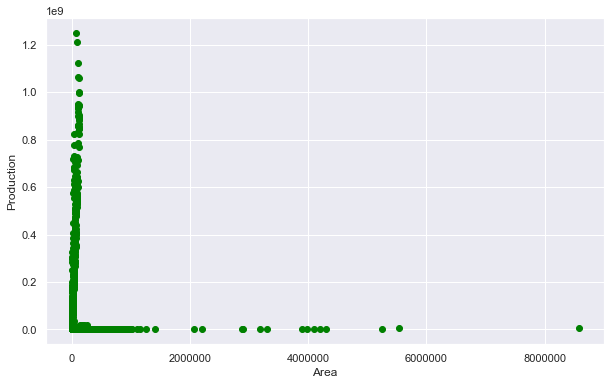

In [52]:
# Scatter Plot (Numerical & Numerical)
plt.figure(figsize = [10,6])
plt.scatter(agri.Area , agri.Production , color = 'green')
plt.xlabel('Area')
plt.ylabel('Production')
plt.show()

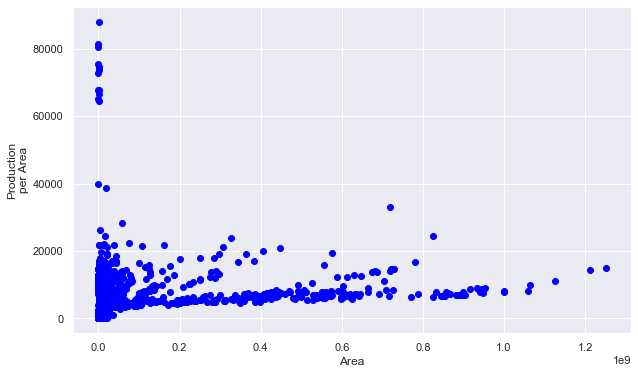

In [53]:
# Scatter Plot (Numerical & Numerical)
plt.figure(figsize = [10,6])
plt.scatter(agri['Production'] , agri['Production\nper Area'] , color = 'blue')
plt.xlabel('Area')
plt.ylabel('Production\nper Area')
plt.show()
# as production per area improves with respect to area & vice versa.

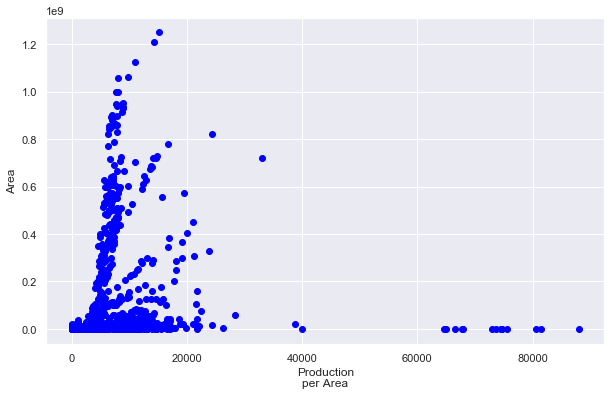

In [54]:
plt.figure(figsize = [10,6])
plt.scatter(agri['Production\nper Area'] , agri['Production'] , color = 'blue')
plt.xlabel('Production\nper Area')
plt.ylabel('Area')
plt.show()

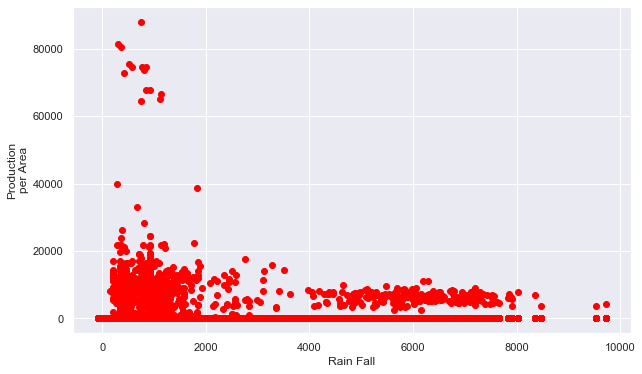

In [55]:
# Scatter Plot (Numerical & Numerical)
plt.figure(figsize = [10,6])
plt.scatter(agri['Rain Fall'] , agri['Production\nper Area'] , color = 'red')
plt.xlabel('Rain Fall')
plt.ylabel('Production\nper Area')
plt.show()
# with increase in the rain fall there is increase in the production per area. 

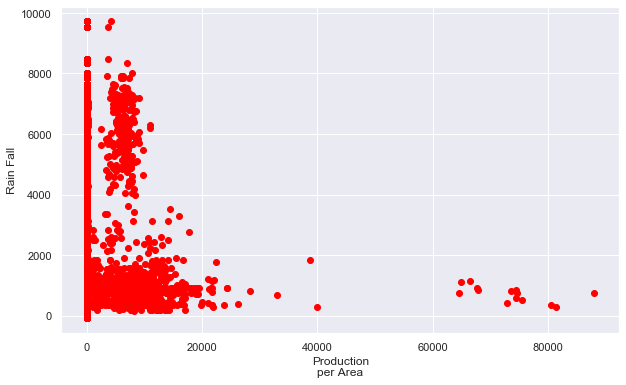

In [56]:
# Scatter Plot (Numerical & Numerical)
plt.figure(figsize = [10,6])
plt.scatter(agri['Production\nper Area'] , agri['Rain Fall'] , color = 'red')
plt.xlabel('Production\nper Area')
plt.ylabel('Rain Fall')
plt.show()

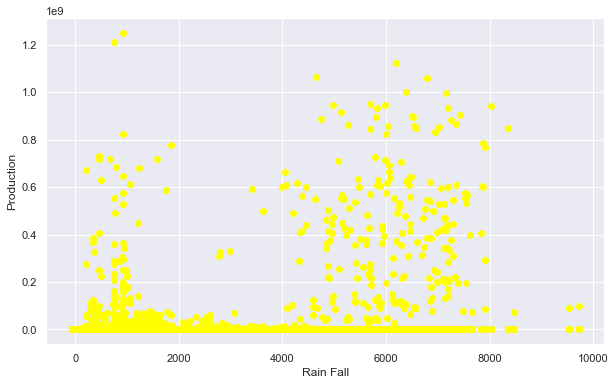

In [57]:
# Scatter Plot (Numerical & Numerical)
plt.figure(figsize = [10,6])
plt.scatter(agri['Rain Fall'] , agri['Production'] , color = 'yellow')
plt.xlabel('Rain Fall')
plt.ylabel('Production')
plt.show()

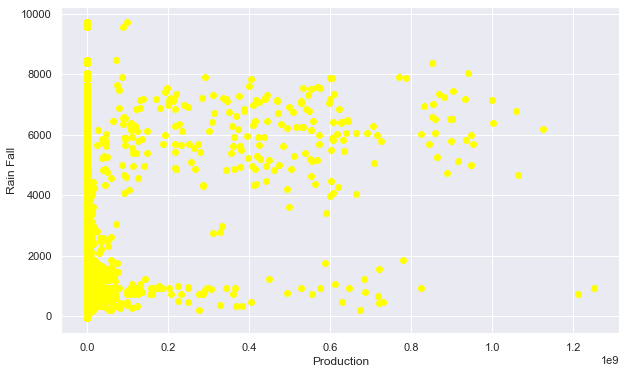

In [58]:
# Scatter Plot (Numerical & Numerical)
plt.figure(figsize = [10,6])
plt.scatter(agri['Production'] , agri['Rain Fall'] , color = 'yellow')
plt.xlabel('Production')
plt.ylabel('Rain Fall')
plt.show()
# with increase in rainfall, there is improvment in production.

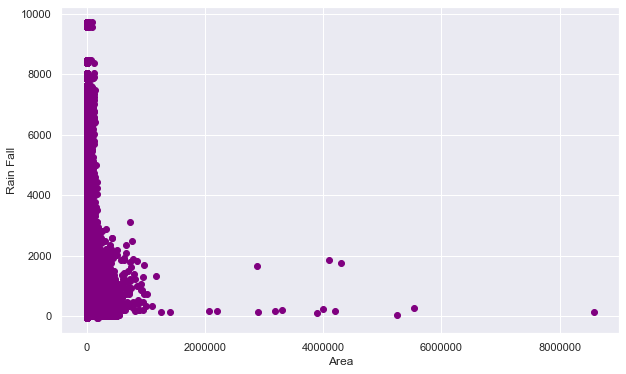

In [59]:
# Scatter Plot (Numerical & Numerical)
plt.figure(figsize = [10,6])
plt.scatter(agri['Area'] , agri['Rain Fall'] , color = 'purple')
plt.xlabel('Area')
plt.ylabel('Rain Fall')
plt.show()

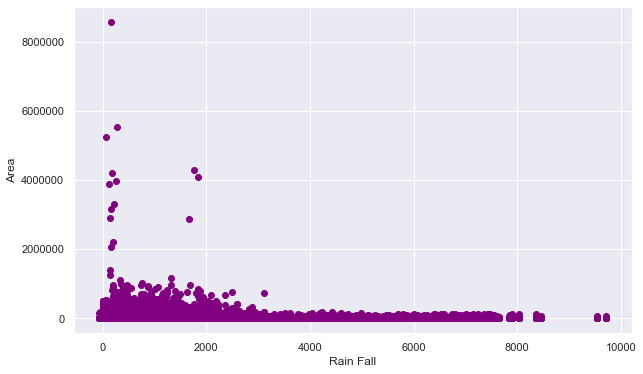

In [60]:
# Scatter Plot (Numerical & Numerical)
plt.figure(figsize = [10,6])
plt.scatter(agri['Rain Fall'] , agri['Area'] , color = 'purple')
plt.xlabel('Rain Fall')
plt.ylabel('Area')
plt.show()

In [61]:
# CrossTab (Catagorical & Catagorical)
pd.set_option('display.max_columns', 124)
pd.crosstab(agri['State Name'], agri['Crop Name']).T

State Name,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
Crop Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Apple,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0
Arcanut (Processed),0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arecanut,18,42,0,400,0,0,0,0,4,0,0,0,0,0,329,252,0,0,0,118,0,0,0,12,0,0,0,213,0,0,0,0,189
Arhar/Tur,2,340,0,454,668,3,294,18,0,341,284,44,1,126,448,13,803,570,1,55,33,141,226,0,215,351,0,432,218,60,1059,165,213
Ash Gourd,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44,0,0,0,0,0
Atcanut (Raw),0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bajra,0,310,0,0,191,0,83,0,0,599,316,53,44,0,347,0,541,386,0,0,0,128,68,19,63,445,0,420,184,0,1174,15,41
Banana,16,156,0,462,226,0,254,9,4,157,8,0,0,0,333,238,203,28,101,120,0,0,0,49,0,45,0,437,94,0,269,0,0
Barley,0,0,0,0,572,0,119,0,0,0,307,134,74,4,0,0,607,0,0,0,0,106,0,0,161,450,72,0,0,0,1273,195,125


In [62]:
# CrossTab (Catagorical & Catagorical)
pd.set_option('display.max_columns', 124)
pd.crosstab(agri['Season'], agri['Crop Name'])

Crop Name,Apple,Arcanut (Processed),Arecanut,Arhar/Tur,Ash Gourd,Atcanut (Raw),Bajra,Banana,Barley,Bean,Beans & Mutter(Vegetable),Beet Root,Ber,Bhindi,Bitter Gourd,Black pepper,Blackgram,Bottle Gourd,Brinjal,Cabbage,Cardamom,Carrot,Cashewnut,Cashewnut Processed,Cashewnut Raw,Castor seed,Cauliflower,Citrus Fruit,Coconut,Coffee,Colocosia,Cond-spcs other,Coriander,Cotton(lint),Cowpea(Lobia),Cucumber,Drum Stick,Dry chillies,Dry ginger,Garlic,Ginger,Gram,Grapes,Groundnut,Guar seed,Horse-gram,Jack Fruit,Jobster,Jowar,Jute,Jute & mesta,Kapas,Khesari,Korra,Lab-Lab,Lemon,Lentil,Linseed,Litchi,Maize,Mango,Masoor,Mesta,Moong(Green Gram),Moth,Niger seed,Oilseeds total,Onion,Orange,Other Rabi pulses,Other Cereals & Millets,Other Citrus Fruit,Other Dry Fruit,Other Fresh Fruits,Other Kharif pulses,Other Vegetables,Paddy,Papaya,Peach,Pear,Peas (vegetable),Peas & beans (Pulses),Perilla,Pineapple,Plums,Pome Fruit,Pome Granet,Potato,Pulses total,Pump Kin,Ragi,Rajmash Kholar,Rapeseed &Mustard,Redish,Ribed Guard,Rice,Ricebean (nagadal),Rubber,Safflower,Samai,Sannhamp,Sapota,Sesamum,Small millets,Snak Guard,Soyabean,Sugarcane,Sunflower,Sweet potato,Tapioca,Tea,Tobacco,Tomato,Total foodgrain,Turmeric,Turnip,Urad,Varagu,Water Melon,Wheat,Yam,other fibres,other misc. pulses,other oilseeds
Season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Autumn,0,0,0,18,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,41,6,0,0,0,0,379,0,0,0,0,3,114,0,0,0,0,0,0,0,0,0,934,0,0,0,190,0,0,0,4,0,0,0,0,0,0,0,0,138,0,0,0,0,6,0,0,0,0,0,6,0,0,375,0,0,0,0,2091,0,0,0,0,6,0,312,9,0,5,6,0,1,1,0,0,0,0,6,0,291,0,0,0,0,0,0,0
Kharif,0,0,16,6798,0,0,4672,131,134,20,0,0,0,0,0,15,42,0,43,29,17,0,57,0,0,2957,0,0,17,0,11,10,8,3974,241,0,0,1281,1372,21,76,99,12,5359,529,2104,0,9,5044,1329,12,8,1,117,0,39,0,7,0,7320,55,80,1705,5577,856,1932,61,627,104,0,358,0,0,0,3651,0,61,147,0,0,0,352,9,0,0,0,21,569,70,0,2448,9,110,0,0,6878,10,0,14,67,916,39,6493,4155,0,3103,1159,2577,753,294,8,177,39,125,135,0,5947,45,0,7,0,0,29,248
Rabi,0,0,118,447,0,0,264,60,4017,0,0,0,0,0,0,118,57,0,43,32,0,0,3,0,0,209,0,0,0,0,0,8,530,138,246,0,0,816,5,544,109,7074,0,1116,0,1170,0,0,1592,9,0,0,1329,9,0,0,31,4335,0,2735,0,4096,3,1943,1,71,29,1539,0,3175,270,0,0,0,8,0,13,4,0,0,0,3965,0,108,0,0,0,1604,27,0,598,9,6978,0,0,797,0,0,1301,20,2,0,539,311,0,41,13,1648,190,9,0,328,39,13,382,0,1872,13,0,7520,0,0,41,303
Summer,0,0,0,28,0,0,331,190,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,66,0,0,241,5,0,0,0,0,1446,0,79,0,0,240,1,0,0,0,0,0,0,0,0,0,2522,0,0,0,2064,0,0,0,855,0,5,0,0,0,0,0,0,129,0,0,0,0,61,0,0,0,0,0,97,2,0,361,0,0,0,0,2956,0,0,0,0,0,0,552,9,0,0,2,1010,0,0,0,78,0,5,1,0,1158,0,0,300,0,0,0,0
Whole Year,4,20,1443,256,44,20,160,2815,48,0,167,16,11,236,92,801,19,84,295,144,410,28,1021,21,35,210,122,301,1968,6,0,0,2830,362,34,93,112,4104,1615,2724,56,173,117,276,766,136,112,0,186,0,8,4,30,0,48,0,0,63,6,240,394,48,79,209,21,51,336,3985,167,0,0,69,1,410,0,381,0,332,4,6,11,135,0,139,6,297,45,4165,167,93,180,0,120,61,38,128,0,29,20,0,1468,0,712,168,82,61,6297,334,3253,1282,54,2115,290,45,3676,8,173,0,85,55,36,10,0,82
Winter,0,0,0,31,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,6,5,0,0,15,0,258,0,413,0,0,0,0,0,0,0,0,0,0,0,0,0,196,0,0,0,335,0,16,0,2,0,0,0,0,0,0,0,0,138,0,0,0,0,5,0,0,0,0,0,490,0,0,183,0,384,0,0,2254,0,0,0,0,3,0,438,0,0,2,444,2,1,0,0,0,0,0,2,0,409,0,0,17,0,0,0,0


In [63]:
# CrossTab (Catagorical & Catagorical)
pd.set_option('display.max_columns', 124)
pd.crosstab(agri['Season'], agri['State Name'])
# Rabi season crops are mostly produced in the State UP.
# Kharif season crops are mostly produced in the State UP.
# Summer season crops are mostly produced in the State UP.
# Whole season crops are mostly produced in the State Assam.
# Winter season crops are mostly produced in the State Bihar.

State Name,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
Season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Autumn,6,0,0,562,860,0,0,0,0,0,0,0,0,293,0,221,0,7,66,81,0,0,2197,6,0,0,0,0,0,0,0,0,650
Kharif,22,4232,890,4214,5888,37,4601,156,79,4248,2778,1410,777,16,8065,279,9267,7275,385,1038,523,2538,2173,328,1639,5618,422,4751,2367,736,14538,2296,2365
Rabi,36,3516,264,4153,6465,27,3209,33,45,1644,1693,794,657,741,5577,0,5560,3824,54,647,255,1244,1456,201,1251,2999,251,679,2198,544,12003,1701,3266
Summer,0,0,0,527,1577,0,4,0,0,888,0,0,0,0,2497,236,0,1011,30,44,0,0,2632,157,0,0,0,0,0,0,4014,99,1125
Whole Year,139,1880,1392,4610,3529,26,2895,0,84,1656,1404,290,200,20,4983,3279,8116,511,682,965,179,124,1309,178,283,3897,41,8117,1084,132,2751,800,1749
Winter,0,0,0,562,566,0,0,74,0,0,0,0,0,196,0,246,0,0,50,92,0,0,3808,6,0,0,0,0,0,0,0,0,458


In [64]:
# CrossTab (Catagorical & Catagorical)
pd.set_option('display.max_columns', 124)
pd.crosstab(agri['Input Cost\n(High/Medium/Low)'], agri['State Name'])
#  high input cost for high category of crops is in the State Chhattisgarh.
#  high input cost for low category of crops is in the State UP.
# high input cost for medium category of crops is in the State UP.

State Name,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
Input Cost (High/Medium/Low),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
High,50,2324,56,2957,974,1,5575,4,33,1546,2394,919,485,91,5961,1183,8348,4621,139,122,125,190,6007,83,341,4269,42,4173,1754,78,5528,885,1483
Low,112,3916,896,5010,4725,62,1838,52,96,2228,1934,455,228,281,7493,2151,4635,1357,700,1157,236,699,2533,428,1391,2134,32,5041,1868,347,10372,1062,3089
Medium,41,3388,1594,6661,13186,27,3296,207,79,4662,1547,1120,921,894,7668,927,9960,6650,428,1588,596,3017,5035,365,1441,6111,640,4333,2027,987,17406,2949,5041


In [65]:
# CrossTab (Catagorical & Catagorical)
pd.set_option('display.max_columns', 124)
pd.crosstab(agri['Market Price\n(High/Medium/Low)'], agri['State Name'])
# high market price for high category crops is in State Chhatisgarh.
# high market price for low category crops is in State UP.
# high market price for medium category crops is in State UP.

State Name,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
Market Price (High/Medium/Low),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
High,50,2324,56,2957,974,1,5575,4,33,1546,2394,919,485,91,5961,1183,8348,4621,139,122,125,190,6007,83,341,4269,42,4173,1754,78,5528,885,1483
Low,126,4624,1230,5792,6250,69,2407,81,120,3304,2303,690,370,406,8769,2421,6025,2336,818,1395,371,1200,3433,507,1486,3262,121,6035,2215,422,13318,1414,3911
Medium,27,2680,1260,5879,11661,20,2727,178,55,3586,1178,885,779,769,6392,657,8570,5671,310,1350,461,2516,4135,286,1346,4983,551,3339,1680,912,14460,2597,4219


In [66]:
# CrossTab (Catagorical & Catagorical)
pd.set_option('display.max_columns', 124)
pd.crosstab(agri['Return\n(High/Moderate/Low)'], agri['State Name'])
# highest return for lowest category crops is in the state UP.
# highest return for moderate category crops is in the state UP.

State Name,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
Return (High/Moderate/Low),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Low,126,4624,1230,5792,6250,69,2407,81,120,3304,2303,690,370,406,8769,2421,6025,2336,818,1395,371,1200,3433,507,1486,3262,121,6036,2215,422,13318,1414,3911
Moderate,77,5004,1316,8836,12635,21,8302,182,88,5132,3572,1804,1264,860,12353,1840,16918,10292,449,1472,586,2706,10142,369,1687,9252,593,7511,3434,990,19988,3482,5702


In [67]:
# CrossTab (Catagorical & Catagorical)
pd.set_option('display.max_columns', 124)
pd.crosstab(agri['Input Cost\n(High/Medium/Low)'], agri['Crop Name'])
# highest input cost is for Urad while lowest for Varagu in high category crops.
# highest input cost is for Wheat while lowest for Urad in low category crops.
# highest input cost is for Arhar/Tur while lowest for Turnip in medium category crops.

Crop Name,Apple,Arcanut (Processed),Arecanut,Arhar/Tur,Ash Gourd,Atcanut (Raw),Bajra,Banana,Barley,Bean,Beans & Mutter(Vegetable),Beet Root,Ber,Bhindi,Bitter Gourd,Black pepper,Blackgram,Bottle Gourd,Brinjal,Cabbage,Cardamom,Carrot,Cashewnut,Cashewnut Processed,Cashewnut Raw,Castor seed,Cauliflower,Citrus Fruit,Coconut,Coffee,Colocosia,Cond-spcs other,Coriander,Cotton(lint),Cowpea(Lobia),Cucumber,Drum Stick,Dry chillies,Dry ginger,Garlic,Ginger,Gram,Grapes,Groundnut,Guar seed,Horse-gram,Jack Fruit,Jobster,Jowar,Jute,Jute & mesta,Kapas,Khesari,Korra,Lab-Lab,Lemon,Lentil,Linseed,Litchi,Maize,Mango,Masoor,Mesta,Moong(Green Gram),Moth,Niger seed,Oilseeds total,Onion,Orange,Other Rabi pulses,Other Cereals & Millets,Other Citrus Fruit,Other Dry Fruit,Other Fresh Fruits,Other Kharif pulses,Other Vegetables,Paddy,Papaya,Peach,Pear,Peas (vegetable),Peas & beans (Pulses),Perilla,Pineapple,Plums,Pome Fruit,Pome Granet,Potato,Pulses total,Pump Kin,Ragi,Rajmash Kholar,Rapeseed &Mustard,Redish,Ribed Guard,Rice,Ricebean (nagadal),Rubber,Safflower,Samai,Sannhamp,Sapota,Sesamum,Small millets,Snak Guard,Soyabean,Sugarcane,Sunflower,Sweet potato,Tapioca,Tea,Tobacco,Tomato,Total foodgrain,Turmeric,Turnip,Urad,Varagu,Water Melon,Wheat,Yam,other fibres,other misc. pulses,other oilseeds
Input Cost (High/Medium/Low),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
High,4,0,159,1849,44,0,827,107,211,0,67,16,11,120,82,441,24,73,120,108,419,9,697,21,19,1915,104,122,119,1,0,2,2037,1124,442,93,63,824,49,133,0,1420,21,717,295,2687,43,0,1029,47,0,3,279,44,48,0,1,2634,6,494,119,1316,48,6612,715,1679,39,46,34,1512,180,69,1,270,2219,287,3,76,4,6,11,872,0,0,6,128,45,36,93,93,693,0,2440,42,38,601,0,0,697,41,1367,0,6702,1922,82,342,115,1571,105,4,8,462,93,30,149,4,5758,3,85,164,36,10,58,376
Low,0,0,340,120,0,20,596,3088,1574,0,85,0,0,114,10,170,0,11,266,95,1,17,10,0,0,122,18,120,1846,0,11,0,13,1272,4,0,2,1140,1640,2066,240,45,108,704,31,2,69,0,428,1286,20,0,2,0,0,39,0,7,0,5653,273,29,1422,5,0,6,7,6658,199,36,8,0,0,108,19,65,171,387,0,0,0,334,0,246,0,159,21,6731,1,0,458,0,75,17,0,7019,0,0,4,0,397,39,11,24,0,89,7680,143,3946,1565,40,740,273,60,2000,0,13,0,0,3644,0,0,0,31
Medium,0,20,1078,5609,0,0,4004,14,2414,20,15,0,0,2,0,323,94,0,0,2,7,2,374,0,16,1339,0,59,20,5,0,16,1319,2122,141,0,47,4525,1319,1090,1,5896,0,7413,969,1213,0,9,5608,120,0,9,1079,82,0,0,30,1764,0,7800,57,2879,317,3701,163,385,380,308,38,1632,440,0,0,32,1421,29,305,20,0,0,0,3318,9,1,0,10,0,164,172,0,2994,18,5077,2,0,7484,10,29,634,46,631,0,2333,2706,0,2781,126,3857,147,17,14,1496,2,98,2053,4,4079,55,0,4091,0,0,12,226


In [68]:
# CrossTab (Catagorical & Catagorical)
pd.set_option('display.max_columns', 124)
pd.crosstab(agri['Market Price\n(High/Medium/Low)'], agri['Crop Name'])
# highest market price is for Urad while lowest for Varagu in high category crops.
# highest market price is for Wheat while lowest for Varagu in low category crops.
# highest marekt price is for Arhar/Tur while lowest for Turnip in medim category crops.

Crop Name,Apple,Arcanut (Processed),Arecanut,Arhar/Tur,Ash Gourd,Atcanut (Raw),Bajra,Banana,Barley,Bean,Beans & Mutter(Vegetable),Beet Root,Ber,Bhindi,Bitter Gourd,Black pepper,Blackgram,Bottle Gourd,Brinjal,Cabbage,Cardamom,Carrot,Cashewnut,Cashewnut Processed,Cashewnut Raw,Castor seed,Cauliflower,Citrus Fruit,Coconut,Coffee,Colocosia,Cond-spcs other,Coriander,Cotton(lint),Cowpea(Lobia),Cucumber,Drum Stick,Dry chillies,Dry ginger,Garlic,Ginger,Gram,Grapes,Groundnut,Guar seed,Horse-gram,Jack Fruit,Jobster,Jowar,Jute,Jute & mesta,Kapas,Khesari,Korra,Lab-Lab,Lemon,Lentil,Linseed,Litchi,Maize,Mango,Masoor,Mesta,Moong(Green Gram),Moth,Niger seed,Oilseeds total,Onion,Orange,Other Rabi pulses,Other Cereals & Millets,Other Citrus Fruit,Other Dry Fruit,Other Fresh Fruits,Other Kharif pulses,Other Vegetables,Paddy,Papaya,Peach,Pear,Peas (vegetable),Peas & beans (Pulses),Perilla,Pineapple,Plums,Pome Fruit,Pome Granet,Potato,Pulses total,Pump Kin,Ragi,Rajmash Kholar,Rapeseed &Mustard,Redish,Ribed Guard,Rice,Ricebean (nagadal),Rubber,Safflower,Samai,Sannhamp,Sapota,Sesamum,Small millets,Snak Guard,Soyabean,Sugarcane,Sunflower,Sweet potato,Tapioca,Tea,Tobacco,Tomato,Total foodgrain,Turmeric,Turnip,Urad,Varagu,Water Melon,Wheat,Yam,other fibres,other misc. pulses,other oilseeds
Market Price (High/Medium/Low),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
High,4,0,159,1849,44,0,827,107,211,0,67,16,11,120,82,441,24,73,120,108,419,9,697,21,19,1915,104,122,119,1,0,2,2037,1124,442,93,63,824,49,133,0,1420,21,717,295,2687,43,0,1029,47,0,3,279,44,48,0,1,2634,6,494,119,1316,48,6612,715,1679,39,46,34,1512,180,69,1,270,2219,287,3,76,4,6,11,872,0,0,6,128,45,36,93,93,693,0,2440,42,38,601,0,0,697,41,1367,0,6702,1922,82,342,115,1571,105,4,8,462,93,30,149,4,5758,3,85,164,36,10,58,376
Low,0,3,538,451,0,20,1441,3090,2353,0,87,0,0,116,10,334,0,11,266,95,6,17,14,0,0,327,18,120,1859,0,11,0,24,1975,12,0,6,1702,2057,2396,240,293,108,2058,37,6,69,0,1081,1352,20,0,28,0,0,39,0,28,0,8510,322,84,1612,20,0,7,22,6830,234,91,20,0,0,116,39,69,302,392,0,0,0,634,0,246,0,162,21,6806,1,0,1213,0,420,19,0,9950,0,0,11,0,540,39,18,91,0,404,7736,763,3983,1572,45,1075,274,91,2558,0,22,1,0,5108,0,0,0,40
Medium,0,17,880,5278,0,0,3159,12,1635,20,13,0,0,0,0,159,94,0,0,2,2,2,370,0,16,1134,0,59,7,5,0,16,1308,1419,133,0,43,3963,902,760,1,5648,0,6059,963,1209,0,9,4955,54,0,9,1053,82,0,0,30,1743,0,4943,8,2824,127,3686,163,384,365,136,3,1577,428,0,0,24,1401,25,174,15,0,0,0,3018,9,1,0,7,0,89,172,0,2239,18,4732,0,0,4553,10,29,627,46,488,0,2326,2639,0,2466,70,3237,110,10,9,1161,1,67,1495,4,4070,54,0,2627,0,0,12,217


In [69]:
# CrossTab (Catagorical & Catagorical)
pd.set_option('display.max_columns', 124)
pd.crosstab(agri['Return\n(High/Moderate/Low)'], agri['Crop Name'])
# Wheat has the highest return, while the lowest return is for YAM for low category crops.
# Arhar/Tur has the highest return while the lowest return is for the Apple for the moderate category crops.

Crop Name,Apple,Arcanut (Processed),Arecanut,Arhar/Tur,Ash Gourd,Atcanut (Raw),Bajra,Banana,Barley,Bean,Beans & Mutter(Vegetable),Beet Root,Ber,Bhindi,Bitter Gourd,Black pepper,Blackgram,Bottle Gourd,Brinjal,Cabbage,Cardamom,Carrot,Cashewnut,Cashewnut Processed,Cashewnut Raw,Castor seed,Cauliflower,Citrus Fruit,Coconut,Coffee,Colocosia,Cond-spcs other,Coriander,Cotton(lint),Cowpea(Lobia),Cucumber,Drum Stick,Dry chillies,Dry ginger,Garlic,Ginger,Gram,Grapes,Groundnut,Guar seed,Horse-gram,Jack Fruit,Jobster,Jowar,Jute,Jute & mesta,Kapas,Khesari,Korra,Lab-Lab,Lemon,Lentil,Linseed,Litchi,Maize,Mango,Masoor,Mesta,Moong(Green Gram),Moth,Niger seed,Oilseeds total,Onion,Orange,Other Rabi pulses,Other Cereals & Millets,Other Citrus Fruit,Other Dry Fruit,Other Fresh Fruits,Other Kharif pulses,Other Vegetables,Paddy,Papaya,Peach,Pear,Peas (vegetable),Peas & beans (Pulses),Perilla,Pineapple,Plums,Pome Fruit,Pome Granet,Potato,Pulses total,Pump Kin,Ragi,Rajmash Kholar,Rapeseed &Mustard,Redish,Ribed Guard,Rice,Ricebean (nagadal),Rubber,Safflower,Samai,Sannhamp,Sapota,Sesamum,Small millets,Snak Guard,Soyabean,Sugarcane,Sunflower,Sweet potato,Tapioca,Tea,Tobacco,Tomato,Total foodgrain,Turmeric,Turnip,Urad,Varagu,Water Melon,Wheat,Yam,other fibres,other misc. pulses,other oilseeds
Return (High/Moderate/Low),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Low,0,20,843,759,44,20,1543,2130,2338,0,89,14,11,63,28,239,0,44,199,77,85,17,479,0,35,702,18,173,1044,3,11,0,285,1775,214,0,59,1940,2005,2473,240,537,104,1724,36,535,59,0,1763,1296,20,0,26,32,42,39,0,323,6,7362,271,89,1168,773,0,277,27,6235,199,285,21,0,0,113,513,117,280,422,0,5,0,824,0,202,6,103,28,6076,54,14,1362,0,755,21,1,7648,0,14,52,12,727,39,618,248,81,406,7430,1023,3708,1372,51,1384,256,89,2377,0,638,6,0,4846,3,0,0,40
Moderate,4,0,734,6819,0,0,3884,1079,1861,20,78,2,0,173,64,695,118,40,187,128,342,11,602,21,0,2674,104,128,941,3,0,18,3084,2743,373,93,53,4549,1003,816,1,6824,25,7110,1259,3367,53,9,5302,157,0,12,1334,94,6,0,31,4082,0,6585,178,4135,619,9545,878,1793,399,777,72,2895,607,69,1,297,3146,264,199,61,4,1,11,3700,9,45,0,194,38,855,212,79,2783,18,6837,40,37,7456,10,15,1283,75,1668,0,8428,4404,1,2806,491,4548,490,214,11,1314,112,99,1825,8,9212,52,85,3053,33,10,70,593


In [70]:
# CrossTab (Catagorical & Catagorical)
pd.crosstab(agri['Input Cost\n(High/Medium/Low)'], agri['Season'])
# input cost Kharif season crops is highest and lowest for Autumn season crops in high category.
# input cost Whole Year season crops is highest and lowest for Autumn season crops in low category.
# input cost Kharif season crops is highest and lowest for Winter season crops in mediam category.

Season,Autumn,Kharif,Rabi,Summer,Whole Year,Winter
Input Cost (High/Medium/Low),,,,,,
High,1049,30370,16265,2084,10868,2105
Low,819,15847,13842,5199,31004,1847
Medium,3081,49734,36880,7558,15433,2106


In [71]:
# CrossTab (Catagorical & Catagorical)
pd.crosstab(agri['Market Price\n(High/Medium/Low)'], agri['Season'])
# market price Kharif season crops is highest and lowest for Autumn season crops in high category.
# market price Whole Year season crops is highest and lowest for Autumn season crops in low category.
# market price Kharif season crops is highest and lowest for Winter season crops in medium category.

Season,Autumn,Kharif,Rabi,Summer,Whole Year,Winter
Market Price (High/Medium/Low),,,,,,
High,1049,30370,16265,2084,10868,2105
Low,1426,23111,18709,7546,33866,2573
Medium,2474,42470,32013,5211,12571,1380


In [72]:
# CrossTab (Catagorical & Catagorical)
pd.crosstab(agri['Return\n(High/Moderate/Low)'], agri['Season'])
# Returns for Whole Year is highest while lowest for Autumn in low category.
# Returns for Kharif is highest while lowest for Winter in moderate category.

Season,Autumn,Kharif,Rabi,Summer,Whole Year,Winter
Return (High/Moderate/Low),,,,,,
Low,1300,23250,18804,7356,33971,2551
Moderate,3649,72701,48183,7485,23334,3507


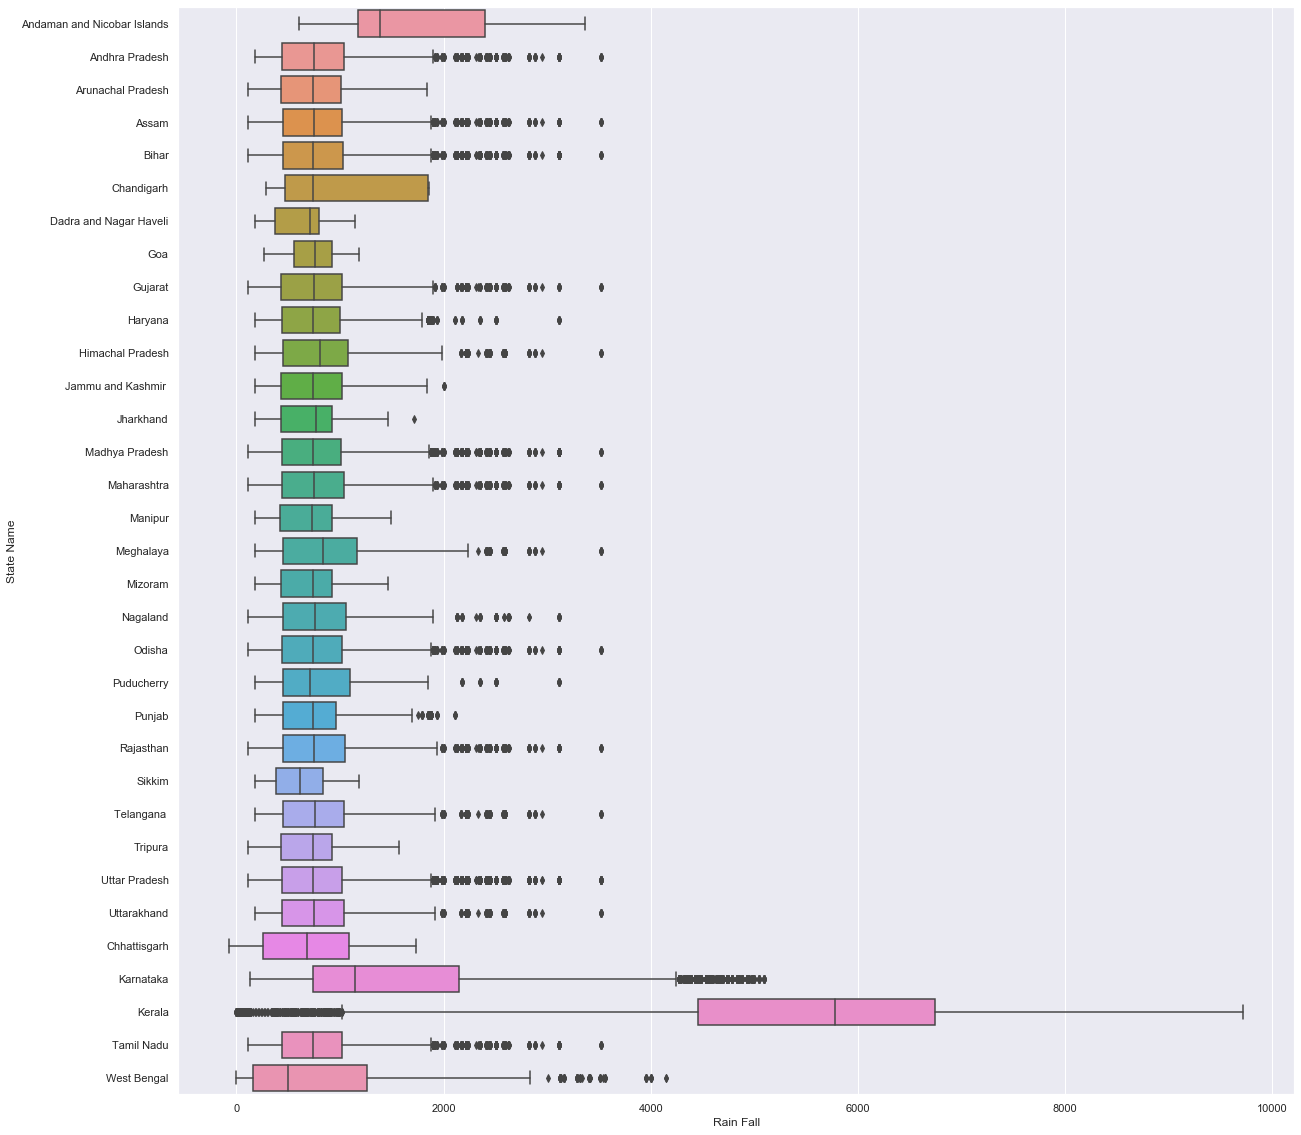

In [73]:
# Boxplot   (Numerical & Catagorical)
plt.figure(figsize = [20,20])
sns.boxplot(x = ('Rain Fall'), y = ('State Name'), data = agri)
plt.show()
# Southern States such as Kerala, Karanataka, West Bengal has recorded the highest rainfall along with Anadaman Islands.
# Presence of Outliers.

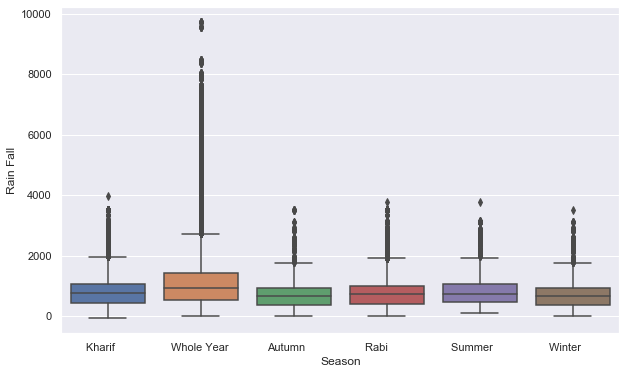

In [74]:
# Boxplot   (Numerical & Catagorical)
plt.figure(figsize = [10,6])
sns.boxplot(x = ('Season'), y = ('Rain Fall'), data = agri)
plt.show()
# Whole Year crops has witnessed highest rainfall across all season followed by other season crops.

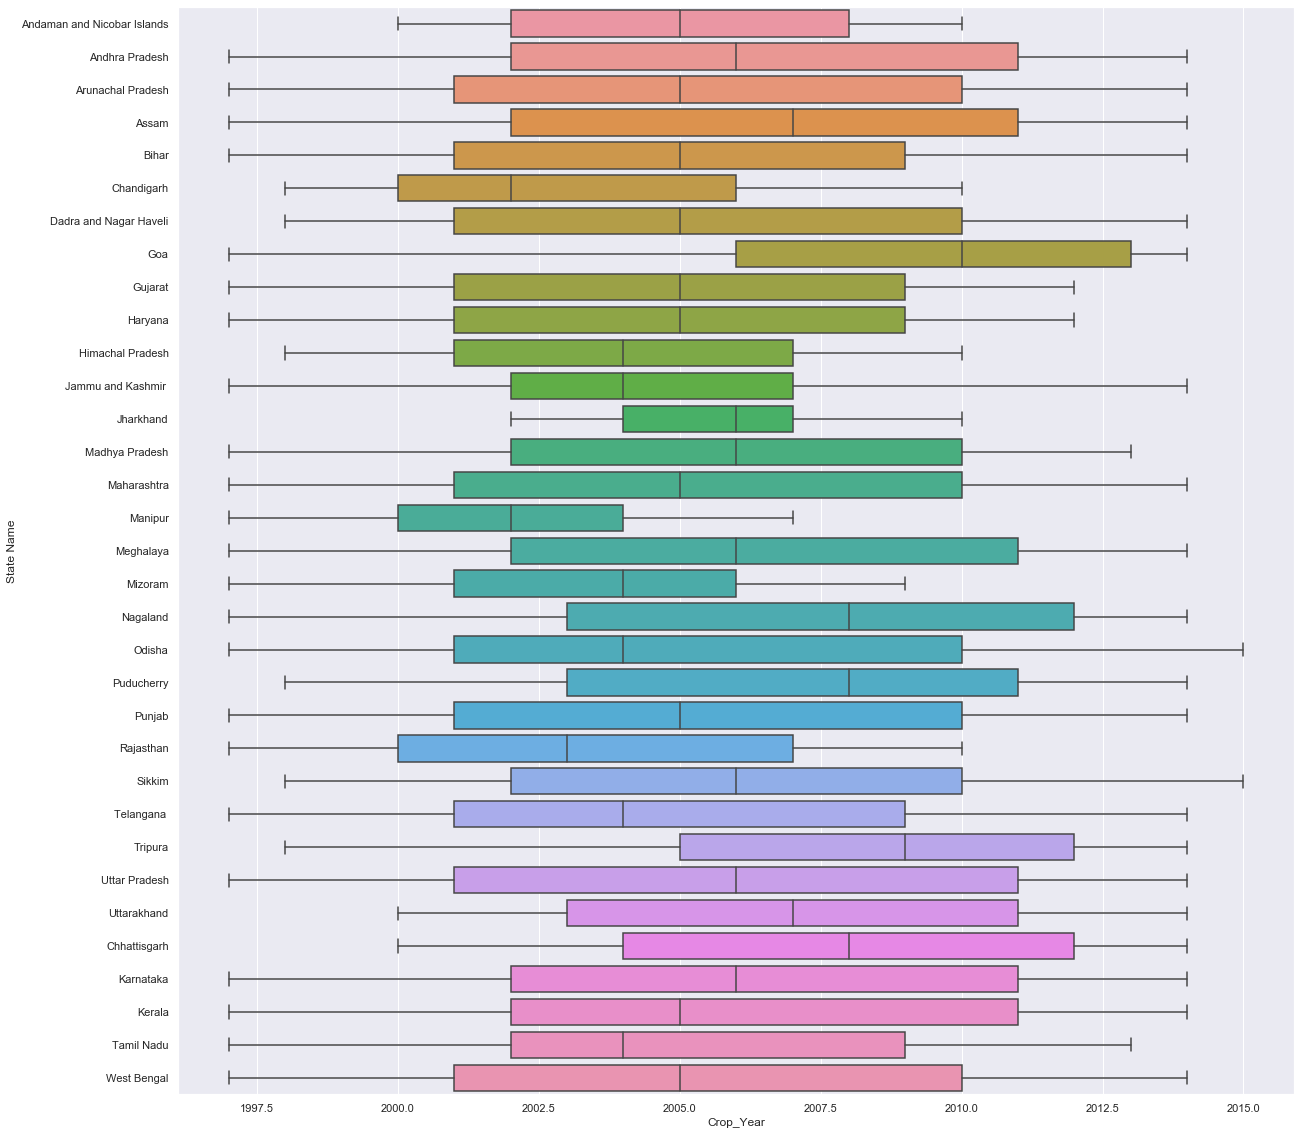

In [75]:
# Boxplot   (Numerical & Catagorical)
plt.figure(figsize = [20,20])
sns.boxplot(x = ('Crop_Year'), y = ('State Name'), data = agri)
plt.show()
# states like Uttarakhand, Jharkhand, Anadaman Islands do not have complete records from 1997 to 2015 prominently.

In [76]:
agri.columns

Index(['State Name', 'City Name', 'Crop_Year', 'Season', 'Crop Name', 'Area',
       'Production', 'Rain Fall', 'Production\nper Area',
       'Input Cost\n(High/Medium/Low)', 'Market Price\n(High/Medium/Low)',
       'Return\n(High/Moderate/Low)'],
      dtype='object')

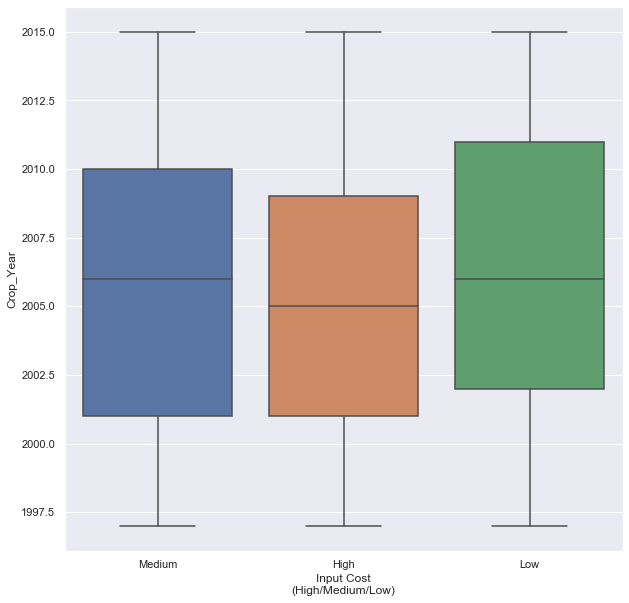

In [77]:
# Boxplot   (Numerical & Catagorical)
plt.figure(figsize = [10,10])
sns.boxplot(x = ('Input Cost\n(High/Medium/Low)'), y = ('Crop_Year'), data = agri)
plt.show()
# medium and low category crops almost have same median for input cost as well as more records than high category crops. 

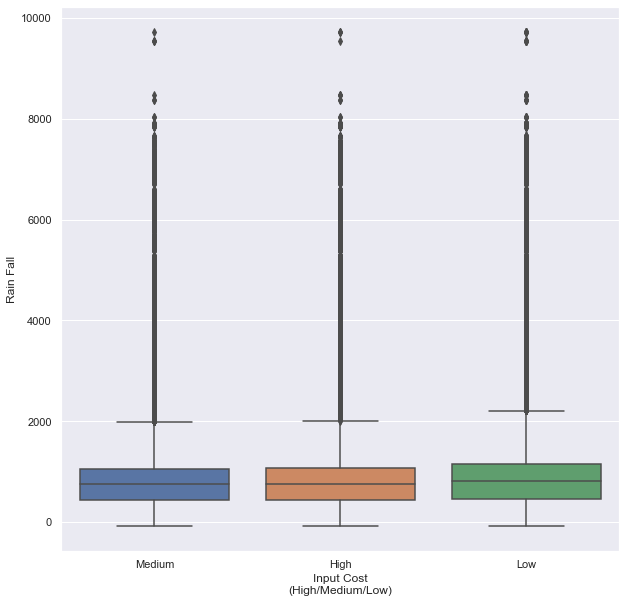

In [78]:
# Boxplot   (Numerical & Catagorical)
plt.figure(figsize = [10,10])
sns.boxplot(x = ('Input Cost\n(High/Medium/Low)'), y = ('Rain Fall'), data = agri)
plt.show()

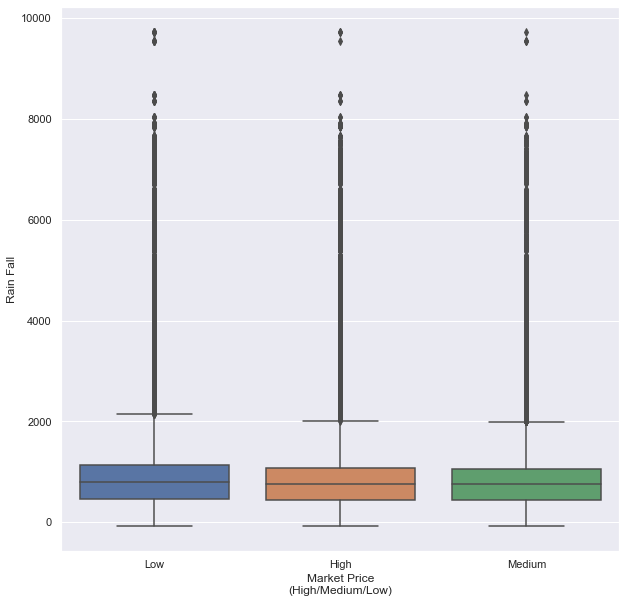

In [79]:
# Boxplot   (Numerical & Catagorical)
plt.figure(figsize = [10,10])
sns.boxplot(x = ('Market Price\n(High/Medium/Low)'), y = ('Rain Fall'), data = agri)
plt.show()

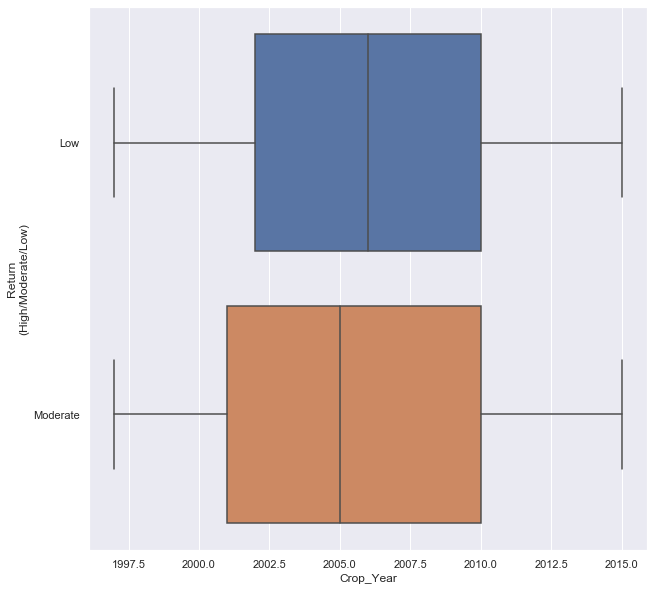

In [80]:
# Boxplot   (Numerical & Catagorical)
plt.figure(figsize = [10,10])
sns.boxplot(x = ('Crop_Year'), y = ('Return\n(High/Moderate/Low)'), data = agri)
plt.show()
# median for return of the moderate crops seems to lie exactly on the year 2005.
# median for return of the low crops seems to lie exactly on the year 2006.

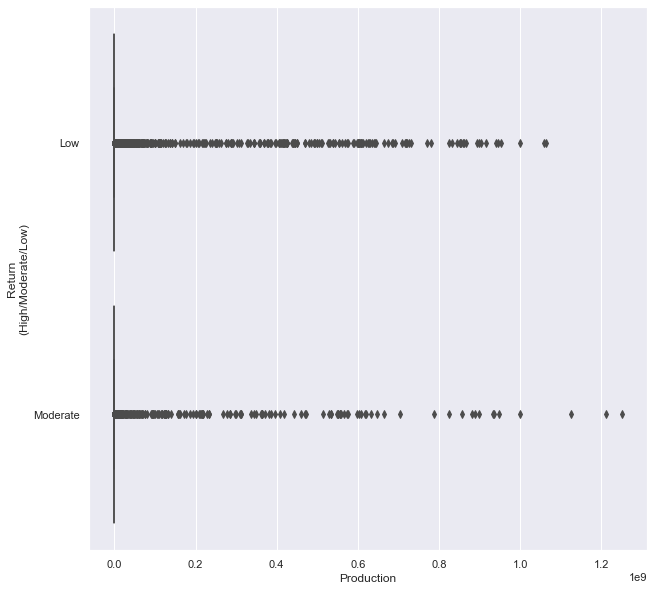

In [81]:
plt.figure(figsize = [10,10])
sns.boxplot(x = ('Production'), y = ('Return\n(High/Moderate/Low)'), data = agri)
plt.show()

#### Group By Functions

In [82]:
agri.columns

Index(['State Name', 'City Name', 'Crop_Year', 'Season', 'Crop Name', 'Area',
       'Production', 'Rain Fall', 'Production\nper Area',
       'Input Cost\n(High/Medium/Low)', 'Market Price\n(High/Medium/Low)',
       'Return\n(High/Moderate/Low)'],
      dtype='object')

In [83]:
agri.groupby(["Crop Name"])["State Name"].describe().T

Crop Name,Apple,Arcanut (Processed),Arecanut,Arhar/Tur,Ash Gourd,Atcanut (Raw),Bajra,Banana,Barley,Bean,Beans & Mutter(Vegetable),Beet Root,Ber,Bhindi,Bitter Gourd,Black pepper,Blackgram,Bottle Gourd,Brinjal,Cabbage,Cardamom,Carrot,Cashewnut,Cashewnut Processed,Cashewnut Raw,Castor seed,Cauliflower,Citrus Fruit,Coconut,Coffee,Colocosia,Cond-spcs other,Coriander,Cotton(lint),Cowpea(Lobia),Cucumber,Drum Stick,Dry chillies,Dry ginger,Garlic,Ginger,Gram,Grapes,Groundnut,Guar seed,Horse-gram,Jack Fruit,Jobster,Jowar,Jute,Jute & mesta,Kapas,Khesari,Korra,Lab-Lab,Lemon,Lentil,Linseed,Litchi,Maize,Mango,Masoor,Mesta,Moong(Green Gram),Moth,Niger seed,Oilseeds total,Onion,Orange,Other Rabi pulses,Other Cereals & Millets,Other Citrus Fruit,Other Dry Fruit,Other Fresh Fruits,Other Kharif pulses,Other Vegetables,Paddy,Papaya,Peach,Pear,Peas (vegetable),Peas & beans (Pulses),Perilla,Pineapple,Plums,Pome Fruit,Pome Granet,Potato,Pulses total,Pump Kin,Ragi,Rajmash Kholar,Rapeseed &Mustard,Redish,Ribed Guard,Rice,Ricebean (nagadal),Rubber,Safflower,Samai,Sannhamp,Sapota,Sesamum,Small millets,Snak Guard,Soyabean,Sugarcane,Sunflower,Sweet potato,Tapioca,Tea,Tobacco,Tomato,Total foodgrain,Turmeric,Turnip,Urad,Varagu,Water Melon,Wheat,Yam,other fibres,other misc. pulses,other oilseeds
count,4,20,1577,7578,44,20,5427,3209,4199,20,167,16,11,236,92,934,118,84,386,205,427,28,1081,21,35,3376,122,301,1985,6,11,18,3369,4518,587,93,112,6489,3008,3289,241,7361,129,8834,1295,3902,112,9,7065,1453,20,12,1360,126,48,39,31,4405,6,13947,449,4224,1787,10318,878,2070,426,7012,271,3180,628,69,1,410,3659,381,479,483,4,6,11,4524,9,247,6,297,66,6931,266,93,4145,18,7592,61,38,15104,10,29,1335,87,2395,39,9046,4652,82,3212,7921,5571,4198,1586,62,2698,368,188,4202,8,9850,58,85,7899,36,10,70,633
unique,1,1,10,29,1,1,20,20,14,1,7,1,1,6,3,8,4,4,8,5,5,3,11,1,2,17,3,8,13,1,1,1,16,25,7,3,2,24,23,18,8,26,8,27,7,15,3,1,22,13,1,3,4,3,1,1,2,18,1,31,12,21,14,26,9,13,9,22,7,26,8,2,1,12,26,11,5,11,1,1,2,18,1,6,1,7,2,27,8,2,20,1,30,3,1,33,1,2,9,3,15,1,28,24,2,22,31,22,19,13,2,21,7,6,23,2,27,3,3,29,1,3,5,13
top,Tamil Nadu,Karnataka,Assam,Uttar Pradesh,Tamil Nadu,Karnataka,Uttar Pradesh,Assam,Uttar Pradesh,Nagaland,Madhya Pradesh,Tamil Nadu,Tamil Nadu,Madhya Pradesh,Tamil Nadu,Kerala,Nagaland,Tamil Nadu,Andhra Pradesh,Andhra Pradesh,Kerala,Manipur,Tamil Nadu,Karnataka,Karnataka,Assam,Madhya Pradesh,Madhya Pradesh,Karnataka,Kerala,Nagaland,Jammu and Kashmir,Madhya Pradesh,Tamil Nadu,Karnataka,Tamil Nadu,Kerala,Karnataka,Madhya Pradesh,Madhya Pradesh,Assam,Uttar Pradesh,Karnataka,Odisha,Uttar Pradesh,Karnataka,Tamil Nadu,Nagaland,Uttar Pradesh,Assam,Tripura,Mizoram,Bihar,Andhra Pradesh,Tamil Nadu,Andhra Pradesh,Nagaland,Uttar Pradesh,Tamil Nadu,Uttar Pradesh,Madhya Pradesh,Uttar Pradesh,Assam,Uttar Pradesh,Rajasthan,Karnataka,Arunachal Pradesh,Uttar Pradesh,Assam,Karnataka,Gujarat,Tamil Nadu,Telangana,Madhya Pradesh,Karnataka,Madhya Pradesh,Assam,Assam,Tamil Nadu,Tamil Nadu,Telangana,Uttar Pradesh,Nagaland,Assam,Tamil Nadu,Madhya Pradesh,Tamil Nadu,Uttar Pradesh,Arunachal Pradesh,Tamil Nadu,Karnataka,Nagaland,Uttar Pradesh,Tamil Nadu,Tamil Nadu,Uttar Pradesh,Nagaland,Kerala,Maharashtra,Andhra Pradesh,Uttar Pradesh,Andhra Pradesh,Uttar Pradesh,Uttar Pradesh,Tamil Nadu,Madhya Pradesh,Uttar Pradesh,Karnataka,Uttar Pradesh,Assam,Nagaland,Uttar Pradesh,Andhra Pradesh,Tamil Nadu,Uttar Pradesh,Jammu and Kashmir,Uttar Pradesh,Tamil Nadu,Tamil Nadu,Uttar Pradesh,Tamil Nadu,Rajasthan,Assam,Uttarakhand
freq,4,20,400,1059,44,20,1174,462,1273,20,45,16,11,91,54,252,41,33,104,80,149,18,365,21,21,397,90,77,479,6,11,18,642,512,319,51,57,949,486,672,108,1242,30,1156,649,907,54,9,1116,454,20,8,583,56,48,39,18,816,6,2552,84,1061,407,1841,340,407,271,1736,150,386,237,54,1,79,406,93,295,154,4,6,8,983,9,154,6,89,45,1276,67,51,838,18,1275,41,38,1611,10,28,339,40,526,39,1107,583,54,800,1276,1150,722,419,46,465,104,56,579,6,1997,43,32,1275,36,7,22,193


In [84]:
agri.groupby(["Crop Name"])["State Name"].describe().T

Crop Name,Apple,Arcanut (Processed),Arecanut,Arhar/Tur,Ash Gourd,Atcanut (Raw),Bajra,Banana,Barley,Bean,Beans & Mutter(Vegetable),Beet Root,Ber,Bhindi,Bitter Gourd,Black pepper,Blackgram,Bottle Gourd,Brinjal,Cabbage,Cardamom,Carrot,Cashewnut,Cashewnut Processed,Cashewnut Raw,Castor seed,Cauliflower,Citrus Fruit,Coconut,Coffee,Colocosia,Cond-spcs other,Coriander,Cotton(lint),Cowpea(Lobia),Cucumber,Drum Stick,Dry chillies,Dry ginger,Garlic,Ginger,Gram,Grapes,Groundnut,Guar seed,Horse-gram,Jack Fruit,Jobster,Jowar,Jute,Jute & mesta,Kapas,Khesari,Korra,Lab-Lab,Lemon,Lentil,Linseed,Litchi,Maize,Mango,Masoor,Mesta,Moong(Green Gram),Moth,Niger seed,Oilseeds total,Onion,Orange,Other Rabi pulses,Other Cereals & Millets,Other Citrus Fruit,Other Dry Fruit,Other Fresh Fruits,Other Kharif pulses,Other Vegetables,Paddy,Papaya,Peach,Pear,Peas (vegetable),Peas & beans (Pulses),Perilla,Pineapple,Plums,Pome Fruit,Pome Granet,Potato,Pulses total,Pump Kin,Ragi,Rajmash Kholar,Rapeseed &Mustard,Redish,Ribed Guard,Rice,Ricebean (nagadal),Rubber,Safflower,Samai,Sannhamp,Sapota,Sesamum,Small millets,Snak Guard,Soyabean,Sugarcane,Sunflower,Sweet potato,Tapioca,Tea,Tobacco,Tomato,Total foodgrain,Turmeric,Turnip,Urad,Varagu,Water Melon,Wheat,Yam,other fibres,other misc. pulses,other oilseeds
count,4,20,1577,7578,44,20,5427,3209,4199,20,167,16,11,236,92,934,118,84,386,205,427,28,1081,21,35,3376,122,301,1985,6,11,18,3369,4518,587,93,112,6489,3008,3289,241,7361,129,8834,1295,3902,112,9,7065,1453,20,12,1360,126,48,39,31,4405,6,13947,449,4224,1787,10318,878,2070,426,7012,271,3180,628,69,1,410,3659,381,479,483,4,6,11,4524,9,247,6,297,66,6931,266,93,4145,18,7592,61,38,15104,10,29,1335,87,2395,39,9046,4652,82,3212,7921,5571,4198,1586,62,2698,368,188,4202,8,9850,58,85,7899,36,10,70,633
unique,1,1,10,29,1,1,20,20,14,1,7,1,1,6,3,8,4,4,8,5,5,3,11,1,2,17,3,8,13,1,1,1,16,25,7,3,2,24,23,18,8,26,8,27,7,15,3,1,22,13,1,3,4,3,1,1,2,18,1,31,12,21,14,26,9,13,9,22,7,26,8,2,1,12,26,11,5,11,1,1,2,18,1,6,1,7,2,27,8,2,20,1,30,3,1,33,1,2,9,3,15,1,28,24,2,22,31,22,19,13,2,21,7,6,23,2,27,3,3,29,1,3,5,13
top,Tamil Nadu,Karnataka,Assam,Uttar Pradesh,Tamil Nadu,Karnataka,Uttar Pradesh,Assam,Uttar Pradesh,Nagaland,Madhya Pradesh,Tamil Nadu,Tamil Nadu,Madhya Pradesh,Tamil Nadu,Kerala,Nagaland,Tamil Nadu,Andhra Pradesh,Andhra Pradesh,Kerala,Manipur,Tamil Nadu,Karnataka,Karnataka,Assam,Madhya Pradesh,Madhya Pradesh,Karnataka,Kerala,Nagaland,Jammu and Kashmir,Madhya Pradesh,Tamil Nadu,Karnataka,Tamil Nadu,Kerala,Karnataka,Madhya Pradesh,Madhya Pradesh,Assam,Uttar Pradesh,Karnataka,Odisha,Uttar Pradesh,Karnataka,Tamil Nadu,Nagaland,Uttar Pradesh,Assam,Tripura,Mizoram,Bihar,Andhra Pradesh,Tamil Nadu,Andhra Pradesh,Nagaland,Uttar Pradesh,Tamil Nadu,Uttar Pradesh,Madhya Pradesh,Uttar Pradesh,Assam,Uttar Pradesh,Rajasthan,Karnataka,Arunachal Pradesh,Uttar Pradesh,Assam,Karnataka,Gujarat,Tamil Nadu,Telangana,Madhya Pradesh,Karnataka,Madhya Pradesh,Assam,Assam,Tamil Nadu,Tamil Nadu,Telangana,Uttar Pradesh,Nagaland,Assam,Tamil Nadu,Madhya Pradesh,Tamil Nadu,Uttar Pradesh,Arunachal Pradesh,Tamil Nadu,Karnataka,Nagaland,Uttar Pradesh,Tamil Nadu,Tamil Nadu,Uttar Pradesh,Nagaland,Kerala,Maharashtra,Andhra Pradesh,Uttar Pradesh,Andhra Pradesh,Uttar Pradesh,Uttar Pradesh,Tamil Nadu,Madhya Pradesh,Uttar Pradesh,Karnataka,Uttar Pradesh,Assam,Nagaland,Uttar Pradesh,Andhra Pradesh,Tamil Nadu,Uttar Pradesh,Jammu and Kashmir,Uttar Pradesh,Tamil Nadu,Tamil Nadu,Uttar Pradesh,Tamil Nadu,Rajasthan,Assam,Uttarakhand
freq,4,20,400,1059,44,20,1174,462,1273,20,45,16,11,91,54,252,41,33,104,80,149,18,365,21,21,397,90,77,479,6,11,18,642,512,319,51,57,949,486,672,108,1242,30,1156,649,907,54,9,1116,454,20,8,583,56,48,39,18,816,6,2552,84,1061,407,1841,340,407,271,1736,150,386,237,54,1,79,406,93,295,154,4,6,8,983,9,154,6,89,45,1276,67,51,838,18,1275,41,38,1611,10,28,339,40,526,39,1107,583,54,800,1276,1150,722,419,46,465,104,56,579,6,1997,43,32,1275,36,7,22,193


In [85]:
agri.groupby(["Production"])["Return\n(High/Moderate/Low)"].value_counts()

Production    Return\n(High/Moderate/Low)
0.000000e+00  Moderate                       3162
              Low                             361
1.000000e-02  Moderate                         57
2.000000e-02  Low                               1
8.000000e-02  Moderate                          1
1.000000e-01  Moderate                        137
              Low                               6
1.100000e-01  Moderate                          1
1.200000e-01  Low                               1
1.600000e-01  Moderate                          1
2.000000e-01  Moderate                         61
3.000000e-01  Moderate                         47
3.100000e-01  Low                               1
              Moderate                          1
3.300000e-01  Low                               1
3.800000e-01  Moderate                          1
4.000000e-01  Moderate                         40
              Low                               1
4.500000e-01  Moderate                          1
5.000000

In [86]:
agri.groupby("Crop Name")["Return\n(High/Moderate/Low)"].describe().T

Crop Name,Apple,Arcanut (Processed),Arecanut,Arhar/Tur,Ash Gourd,Atcanut (Raw),Bajra,Banana,Barley,Bean,Beans & Mutter(Vegetable),Beet Root,Ber,Bhindi,Bitter Gourd,Black pepper,Blackgram,Bottle Gourd,Brinjal,Cabbage,Cardamom,Carrot,Cashewnut,Cashewnut Processed,Cashewnut Raw,Castor seed,Cauliflower,Citrus Fruit,Coconut,Coffee,Colocosia,Cond-spcs other,Coriander,Cotton(lint),Cowpea(Lobia),Cucumber,Drum Stick,Dry chillies,Dry ginger,Garlic,Ginger,Gram,Grapes,Groundnut,Guar seed,Horse-gram,Jack Fruit,Jobster,Jowar,Jute,Jute & mesta,Kapas,Khesari,Korra,Lab-Lab,Lemon,Lentil,Linseed,Litchi,Maize,Mango,Masoor,Mesta,Moong(Green Gram),Moth,Niger seed,Oilseeds total,Onion,Orange,Other Rabi pulses,Other Cereals & Millets,Other Citrus Fruit,Other Dry Fruit,Other Fresh Fruits,Other Kharif pulses,Other Vegetables,Paddy,Papaya,Peach,Pear,Peas (vegetable),Peas & beans (Pulses),Perilla,Pineapple,Plums,Pome Fruit,Pome Granet,Potato,Pulses total,Pump Kin,Ragi,Rajmash Kholar,Rapeseed &Mustard,Redish,Ribed Guard,Rice,Ricebean (nagadal),Rubber,Safflower,Samai,Sannhamp,Sapota,Sesamum,Small millets,Snak Guard,Soyabean,Sugarcane,Sunflower,Sweet potato,Tapioca,Tea,Tobacco,Tomato,Total foodgrain,Turmeric,Turnip,Urad,Varagu,Water Melon,Wheat,Yam,other fibres,other misc. pulses,other oilseeds
count,4,20,1577,7578,44,20,5427,3209,4199,20,167,16,11,236,92,934,118,84,386,205,427,28,1081,21,35,3376,122,301,1985,6,11,18,3369,4518,587,93,112,6489,3008,3289,241,7361,129,8834,1295,3902,112,9,7065,1453,20,12,1360,126,48,39,31,4405,6,13947,449,4224,1787,10318,878,2070,426,7012,271,3180,628,69,1,410,3659,381,479,483,4,6,11,4524,9,247,6,297,66,6931,266,93,4145,18,7592,61,38,15104,10,29,1335,87,2395,39,9046,4652,82,3212,7921,5571,4198,1586,62,2698,368,188,4202,8,9850,58,85,7899,36,10,70,633
unique,1,1,2,2,1,1,2,2,2,1,2,2,1,2,2,2,1,2,2,2,2,2,2,1,1,2,2,2,2,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,1,2,2,1,1,2,2,2,1,1,2,1,2,2,2,2,2,1,2,2,2,2,2,2,1,1,2,2,2,2,2,1,2,1,2,1,2,1,2,2,2,2,2,2,1,2,2,2,2,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,1,2,2,1,1,2
top,Moderate,Low,Low,Moderate,Low,Low,Moderate,Low,Low,Moderate,Low,Low,Low,Moderate,Moderate,Moderate,Moderate,Low,Low,Moderate,Moderate,Low,Moderate,Moderate,Low,Moderate,Moderate,Low,Low,Low,Low,Moderate,Moderate,Moderate,Moderate,Moderate,Low,Moderate,Low,Low,Low,Moderate,Low,Moderate,Moderate,Moderate,Low,Moderate,Moderate,Low,Low,Moderate,Moderate,Moderate,Low,Low,Moderate,Moderate,Low,Low,Low,Moderate,Low,Moderate,Moderate,Moderate,Moderate,Low,Low,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Low,Low,Moderate,Low,Moderate,Moderate,Moderate,Low,Low,Moderate,Moderate,Low,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Low,Moderate,Moderate,Moderate,Moderate,Moderate,Low,Moderate,Moderate,Low,Moderate,Low,Moderate,Low,Low,Low,Low,Low,Moderate,Low,Moderate,Moderate,Moderate,Moderate,Low,Moderate,Moderate,Moderate,Moderate
freq,4,20,843,6819,44,20,3884,2130,2338,20,89,14,11,173,64,695,118,44,199,128,342,17,602,21,35,2674,104,173,1044,3,11,18,3084,2743,373,93,59,4549,2005,2473,240,6824,104,7110,1259,3367,59,9,5302,1296,20,12,1334,94,42,39,31,4082,6,7362,271,4135,1168,9545,878,1793,399,6235,199,2895,607,69,1,297,3146,264,280,422,4,5,11,3700,9,202,6,194,38,6076,212,79,2783,18,6837,40,37,7648,10,15,1283,75,1668,39,8428,4404,81,2806,7430,4548,3708,1372,51,1384,256,99,2377,8,9212,52,85,4846,33,10,70,593


In [87]:
agri.groupby("Crop_Year")["Return\n(High/Moderate/Low)"].count()

Crop_Year
1997     8899
1998    11533
1999    12515
2000    13658
2001    13361
2002    16671
2003    17287
2004    14117
2005    13799
2006    14328
2007    14526
2008    14550
2009    14116
2010    14065
2011    14071
2012    13410
2013    13650
2014    10973
2015      562
Name: Return\n(High/Moderate/Low), dtype: int64

In [88]:
agri.groupby("Crop_Year")["Return\n(High/Moderate/Low)"].value_counts()

Crop_Year  Return\n(High/Moderate/Low)
1997       Moderate                        5984
           Low                             2915
1998       Moderate                        7959
           Low                             3574
1999       Moderate                        8410
           Low                             4105
2000       Moderate                        9401
           Low                             4257
2001       Moderate                        9058
           Low                             4303
2002       Moderate                       11339
           Low                             5332
2003       Moderate                       11252
           Low                             6035
2004       Moderate                        9310
           Low                             4807
2005       Moderate                        9074
           Low                             4725
2006       Moderate                        9434
           Low                             4894
2

In [89]:
agri.groupby("Crop_Year")["Return\n(High/Moderate/Low)"].describe().T

Crop_Year,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,8899,11533,12515,13658,13361,16671,17287,14117,13799,14328,14526,14550,14116,14065,14071,13410,13650,10973,562
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate
freq,5984,7959,8410,9401,9058,11339,11252,9310,9074,9434,9329,9242,9227,8765,8381,7900,7878,6501,415


In [90]:
agri.groupby("State Name")["Return\n(High/Moderate/Low)"].count()

State Name
Andaman and Nicobar Islands      203
Andhra Pradesh                  9628
Arunachal Pradesh               2546
Assam                          14628
Bihar                          18885
Chandigarh                        90
Chhattisgarh                   10709
Dadra and Nagar Haveli           263
Goa                              208
Gujarat                         8436
Haryana                         5875
Himachal Pradesh                2494
Jammu and Kashmir               1634
Jharkhand                       1266
Karnataka                      21122
Kerala                          4261
Madhya Pradesh                 22943
Maharashtra                    12628
Manipur                         1267
Meghalaya                       2867
Mizoram                          957
Nagaland                        3906
Odisha                         13575
Puducherry                       876
Punjab                          3173
Rajasthan                      12514
Sikkim                     

In [91]:
agri.groupby("State Name")["Return\n(High/Moderate/Low)"].value_counts()

State Name                   Return\n(High/Moderate/Low)
Andaman and Nicobar Islands  Low                              126
                             Moderate                          77
Andhra Pradesh               Moderate                        5004
                             Low                             4624
Arunachal Pradesh            Moderate                        1316
                             Low                             1230
Assam                        Moderate                        8836
                             Low                             5792
Bihar                        Moderate                       12635
                             Low                             6250
Chandigarh                   Low                               69
                             Moderate                          21
Chhattisgarh                 Moderate                        8302
                             Low                             2407
Dadra and Nagar Hav

In [92]:
agri.groupby("State Name")["Return\n(High/Moderate/Low)"].describe().T

State Name,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
count,203,9628,2546,14628,18885,90,10709,263,208,8436,5875,2494,1634,1266,21122,4261,22943,12628,1267,2867,957,3906,13575,876,3173,12514,714,13547,5649,1412,33306,4896,9613
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Low,Moderate,Moderate,Moderate,Moderate,Low,Moderate,Moderate,Low,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Low,Moderate,Moderate,Low,Moderate,Moderate,Moderate,Moderate,Low,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate
freq,126,5004,1316,8836,12635,69,8302,182,120,5132,3572,1804,1264,860,12353,2421,16918,10292,818,1472,586,2706,10142,507,1687,9252,593,7511,3434,990,19988,3482,5702


#### Missing Values Treatement

In [93]:
agri.isnull().sum()

State Name                            0
City Name                             0
Crop_Year                             0
Season                                0
Crop Name                             0
Area                                  0
Production                         3730
Rain Fall                           237
Production\nper Area                  0
Input Cost\n(High/Medium/Low)         0
Market Price\n(High/Medium/Low)       0
Return\n(High/Moderate/Low)           0
dtype: int64

In [94]:
agri.isnull().sum()!=0

State Name                         False
City Name                          False
Crop_Year                          False
Season                             False
Crop Name                          False
Area                               False
Production                          True
Rain Fall                           True
Production\nper Area               False
Input Cost\n(High/Medium/Low)      False
Market Price\n(High/Medium/Low)    False
Return\n(High/Moderate/Low)        False
dtype: bool

In [95]:
agri.isnull().sum()[agri.isnull().sum()!=0]

Production    3730
Rain Fall      237
dtype: int64

In [96]:
print(a_train.shape, a_test.shape, agri.shape)

(186839, 12) (59252, 12) (246091, 12)


In [97]:
agri.columns

Index(['State Name', 'City Name', 'Crop_Year', 'Season', 'Crop Name', 'Area',
       'Production', 'Rain Fall', 'Production\nper Area',
       'Input Cost\n(High/Medium/Low)', 'Market Price\n(High/Medium/Low)',
       'Return\n(High/Moderate/Low)'],
      dtype='object')

In [98]:
agri1 = agri.copy()

In [99]:
agri1.dropna(axis = 0, inplace = True)

In [100]:
agri1.isnull().sum()

State Name                         0
City Name                          0
Crop_Year                          0
Season                             0
Crop Name                          0
Area                               0
Production                         0
Rain Fall                          0
Production\nper Area               0
Input Cost\n(High/Medium/Low)      0
Market Price\n(High/Medium/Low)    0
Return\n(High/Moderate/Low)        0
dtype: int64

In [101]:
agri1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242131 entries, 0 to 246090
Data columns (total 12 columns):
State Name                        242131 non-null object
City Name                         242131 non-null object
Crop_Year                         242131 non-null int64
Season                            242131 non-null object
Crop Name                         242131 non-null object
Area                              242131 non-null float64
Production                        242131 non-null float64
Rain Fall                         242131 non-null float64
Production
per Area               242131 non-null float64
Input Cost
(High/Medium/Low)      242131 non-null object
Market Price
(High/Medium/Low)    242131 non-null object
Return
(High/Moderate/Low)        242131 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 24.0+ MB


In [102]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# only after label encoding we should do scaling.
# before train test split we should do label encoding.

In [103]:
agri1['State Name'] = le.fit_transform(agri1['State Name'])
agri1['City Name'] = le.fit_transform(agri1['City Name'])
agri1['Crop Name'] = le.fit_transform(agri1['Crop Name'])
agri1['Season'] = le.fit_transform(agri1['Season'])
agri1['Input Cost\n(High/Medium/Low)'] = le.fit_transform(agri1['Input Cost\n(High/Medium/Low)'])
agri1['Market Price\n(High/Medium/Low)'] = le.fit_transform(agri1['Market Price\n(High/Medium/Low)'])
agri1['Return\n(High/Moderate/Low)'] = agri1['Return\n(High/Moderate/Low)'].replace({'Low':0, 'Moderate':1}).astype('int')

In [104]:
X = agri1.drop(columns = ['Return\n(High/Moderate/Low)'], axis =1)
y = agri1['Return\n(High/Moderate/Low)']

In [105]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.3, random_state = 100)

In [106]:
agri1.head()

,State Name,City Name,Crop_Year,Season,Crop Name,Area,Production,Rain Fall,Production per Area,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low)
0,0,427,2000,1,2,1254.0,2000.0,604.2,1.5949,2,1,0
1,0,427,2000,1,74,2.0,1.0,604.2,0.5000,0,0,1
2,0,427,2000,1,95,102.0,321.0,604.2,3.1471,1,1,0
3,0,427,2000,4,7,176.0,641.0,1381.6,3.6420,1,1,0
4,0,427,2000,4,22,720.0,165.0,1381.6,0.2292,0,0,1


In [107]:
agri1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242131 entries, 0 to 246090
Data columns (total 12 columns):
State Name                        242131 non-null int32
City Name                         242131 non-null int32
Crop_Year                         242131 non-null int64
Season                            242131 non-null int32
Crop Name                         242131 non-null int32
Area                              242131 non-null float64
Production                        242131 non-null float64
Rain Fall                         242131 non-null float64
Production
per Area               242131 non-null float64
Input Cost
(High/Medium/Low)      242131 non-null int32
Market Price
(High/Medium/Low)    242131 non-null int32
Return
(High/Moderate/Low)        242131 non-null int32
dtypes: float64(4), int32(7), int64(1)
memory usage: 17.5 MB


In [108]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(169491, 11)
(72640, 11)
(169491,)
(72640,)


In [109]:
# scaling the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc_Xtrain = pd.DataFrame(sc.fit_transform(Xtrain), columns = Xtrain.columns)
sc_Xtest = pd.DataFrame(sc.fit_transform(Xtest), columns = Xtest.columns)

In [110]:
# SKlearn model
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

model_log = log.fit(sc_Xtrain,ytrain)
y_pred = model_log.predict(sc_Xtest)

C:\Users\ADITYA GUPTA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [111]:
from sklearn.metrics import classification_report,roc_auc_score,f1_score,precision_score,recall_score,accuracy_score,cohen_kappa_score

In [112]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.45      0.54     26138
           1       0.74      0.89      0.81     46502

    accuracy                           0.73     72640
   macro avg       0.71      0.67      0.68     72640
weighted avg       0.72      0.73      0.71     72640



In [113]:
print("The accuracy of the LR model is, Accuracy = ",accuracy_score(ytest,y_pred))
print("The precison of the LR model is,  Precision = ",precision_score(ytest,y_pred))
print("The recall of the LR model is, Recall = ",recall_score(ytest,y_pred))
print("The f1score of the LR model is , F1_Score =",f1_score(ytest,y_pred))
print("The cohen's kappa score of the LR model is , Cohen's Kappa Score = ",cohen_kappa_score(ytest,y_pred))
print("The ROC_AUC score of the LR model ,ROC-AUC Score = ",roc_auc_score(ytest,y_pred))

The accuracy of the LR model is, Accuracy =  0.728648127753304
The precison of the LR model is,  Precision =  0.7409565952547983
The recall of the LR model is, Recall =  0.8858113629521311
The f1score of the LR model is , F1_Score = 0.8069347176649199
The cohen's kappa score of the LR model is , Cohen's Kappa Score =  0.3624539009638532
The ROC_AUC score of the LR model ,ROC-AUC Score =  0.6674255376242023


In [114]:
# Statistical Modelling
import statsmodels.api as sm
import scipy.stats as stats

X_constant = sm.add_constant(X)
reg_log = sm.Logit(y,X_constant).fit()
reg_log.summary()
# in stats log model, we are getting p_values zero for all columns, what inference do we get from this.

C:\Users\ADITYA GUPTA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.541171
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     Return
(High/Moderate/Low)   No. Observations:               242131
Model:                                  Logit   Df Residuals:                   242119
Method:                                   MLE   Df Model:                           11
Date:                        Mon, 23 Dec 2019   Pseudo R-squ.:                  0.1710
Time:                                17:16:32   Log-Likelihood:            -1.3103e+05
converged:                               True   LL-Null:                   -1.5805e+05
Covariance Type:                    nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             87.1638      1.967     44.308      0.000      83.308      91.020
State Name                        -0.0020      0.000     -4.092      0.000      -0.003      -0.001
City Name                         -0.0001   2.55e-05     -4.362      0.000      -0.000   -6.13e-05
Crop_Year                         -0.0423      0.001    -43.192      0.000      -0.044      -0.040
Season                            -0.5159      0.004   -134.167      0.000      -0.523      -0.508
Crop Name                         -0.0051      0.000    -35.379      0.000      -0.005      -0.005
Area                           -3.733e-06   1.24e-07    -30.057      0.000   -3.98e-06   -3.49e-06
Production                      3.192e-09   3.27e-10      9.767      0.000    2.55e-09    3.83e-09
Rain Fall                         -0.0001   5.51e-06    -21.436      0.000      -0.000      -0.000
Production
per Area               -0.0002    1.5e-05    -16.451      0.000      -0.000      -0.000
Input Cost
(High/Medium/Low)      -3.1447      0.025   -127.887      0.000      -3.193      -3.097
Market Price
(High/Medium/Low)     3.4216      0.025    135.820      0.000       3.372       3.471
==================================================================================================
"""

In [115]:
# Applying the decision tree model
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
model_dt=dt.fit(sc_Xtrain,ytrain)
y_pred2=model_dt.predict(sc_Xtest)

In [116]:
print(classification_report(ytest,y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90     26138
           1       0.93      0.96      0.94     46502

    accuracy                           0.93     72640
   macro avg       0.93      0.92      0.92     72640
weighted avg       0.93      0.93      0.93     72640



In [117]:
print("The accuracy of the LR model is, Accuracy = ",accuracy_score(ytest,y_pred2))
print("The precison of the LR model is,  Precision = ",precision_score(ytest,y_pred2))
print("The recall of the LR model is, Recall = ",recall_score(ytest,y_pred2))
print("The f1score of the LR model is , F1_Score =",f1_score(ytest,y_pred2))
print("The cohen's kappa score of the LR model is , Cohen's Kappa Score = ",cohen_kappa_score(ytest,y_pred2))
print("The ROC_AUC score of the LR model ,ROC-AUC Score = ",roc_auc_score(ytest,y_pred2))

The accuracy of the LR model is, Accuracy =  0.9283590308370044
The precison of the LR model is,  Precision =  0.9328567834982392
The recall of the LR model is, Recall =  0.95696959270569
The f1score of the LR model is , F1_Score = 0.9447593571534721
The cohen's kappa score of the LR model is , Cohen's Kappa Score =  0.8429151537340669
The ROC_AUC score of the LR model ,ROC-AUC Score =  0.9172138498381921


                                 Features
State Name                       0.138099
City Name                        0.018442
Crop_Year                        0.029130
Season                           0.030770
Crop Name                        0.061286
Area                             0.019853
Production                       0.017764
Rain Fall                        0.033143
Production\nper Area             0.651160
Input Cost\n(High/Medium/Low)    0.000251
Market Price\n(High/Medium/Low)  0.000101


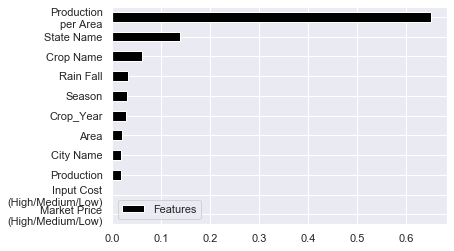

In [118]:
# Feature Selection on the basis of Decision Tree Classifier
# through feature selection we are able to see that input cost and markest prize are contributing nothing to the explanatory power of the model.
features = pd.DataFrame(dt.feature_importances_, index = sc_Xtest.columns,
            columns = ["Features"])
features.sort_values(by = "Features").plot(kind = "barh", color = "black")
print(features)

In [119]:
# Applying Random Forest on this model.
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
model_rf = rf.fit(sc_Xtrain,ytrain)
y_pred3 = model_rf.predict(sc_Xtest)

C:\Users\ADITYA GUPTA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [120]:
print("The accuracy of the LR model is, Accuracy = ",accuracy_score(ytest,y_pred3))
print("The precison of the LR model is,  Precision = ",precision_score(ytest,y_pred3))
print("The recall of the LR model is, Recall = ",recall_score(ytest,y_pred3))
print("The f1score of the LR model is , F1_Score =",f1_score(ytest,y_pred3))
print("The cohen's kappa score of the LR model is , Cohen's Kappa Score = ",cohen_kappa_score(ytest,y_pred3))
print("The ROC_AUC score of the LR model ,ROC-AUC Score = ",roc_auc_score(ytest,y_pred3))

The accuracy of the LR model is, Accuracy =  0.9271751101321586
The precison of the LR model is,  Precision =  0.9291486171276241
The recall of the LR model is, Recall =  0.9593995957163133
The f1score of the LR model is , F1_Score = 0.9440318246259972
The cohen's kappa score of the LR model is , Cohen's Kappa Score =  0.8398965017006306
The ROC_AUC score of the LR model ,ROC-AUC Score =  0.914622133155425


                                 Features
State Name                       0.109092
City Name                        0.031528
Crop_Year                        0.024715
Season                           0.049866
Crop Name                        0.051839
Area                             0.038437
Production                       0.057101
Rain Fall                        0.047806
Production\nper Area             0.391941
Input Cost\n(High/Medium/Low)    0.080159
Market Price\n(High/Medium/Low)  0.117515


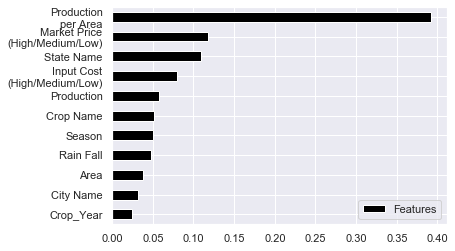

In [121]:
features = pd.DataFrame(rf.feature_importances_, index = sc_Xtest.columns,
            columns = ["Features"])
features.sort_values(by = "Features").plot(kind = "barh", color = "black")
print(features)

In [122]:
agri2 = agri1.copy()

In [123]:
agri2.head()

,State Name,City Name,Crop_Year,Season,Crop Name,Area,Production,Rain Fall,Production per Area,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low)
0,0,427,2000,1,2,1254.0,2000.0,604.2,1.5949,2,1,0
1,0,427,2000,1,74,2.0,1.0,604.2,0.5000,0,0,1
2,0,427,2000,1,95,102.0,321.0,604.2,3.1471,1,1,0
3,0,427,2000,4,7,176.0,641.0,1381.6,3.6420,1,1,0
4,0,427,2000,4,22,720.0,165.0,1381.6,0.2292,0,0,1


In [124]:
agri2.columns

Index(['State Name', 'City Name', 'Crop_Year', 'Season', 'Crop Name', 'Area',
       'Production', 'Rain Fall', 'Production\nper Area',
       'Input Cost\n(High/Medium/Low)', 'Market Price\n(High/Medium/Low)',
       'Return\n(High/Moderate/Low)'],
      dtype='object')

In [125]:
X1 = agri2.drop(['City Name', 'Crop_Year', 'Return\n(High/Moderate/Low)'], axis = 1)
y1 = agri2['Return\n(High/Moderate/Low)']

In [126]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X1,y1, test_size = 0.3, random_state = 100)

In [127]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc_xtrain = pd.DataFrame(sc.fit_transform(xtrain), columns = xtrain.columns)
sc_xtest = pd.DataFrame(sc.fit_transform(xtest), columns = xtest.columns)

In [128]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(169491, 9)
(72640, 9)
(169491,)
(72640,)


In [129]:
# Random FOrest

model_rf2 = rf.fit(xtrain, ytrain)
y_pred4 = model_rf2.predict(xtest)

In [130]:
print("The accuracy of the LR model is, Accuracy = ",accuracy_score(ytest,y_pred4))
print("The precison of the LR model is,  Precision = ",precision_score(ytest,y_pred4))
print("The recall of the LR model is, Recall = ",recall_score(ytest,y_pred4))
print("The f1score of the LR model is , F1_Score =",f1_score(ytest,y_pred4))
print("The cohen's kappa score of the LR model is , Cohen's Kappa Score = ",cohen_kappa_score(ytest,y_pred4))
print("The ROC_AUC score of the LR model ,ROC-AUC Score = ",roc_auc_score(ytest,y_pred4))

The accuracy of the LR model is, Accuracy =  0.9549284140969163
The precison of the LR model is,  Precision =  0.9647772234646482
The recall of the LR model is, Recall =  0.9648187174745172
The f1score of the LR model is , F1_Score = 0.9647979700234393
The cohen's kappa score of the LR model is , Cohen's Kappa Score =  0.902166451566991
The ROC_AUC score of the LR model ,ROC-AUC Score =  0.9510756683248324


In [131]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,y_pred4))

[[24500  1638]
 [ 1636 44866]]


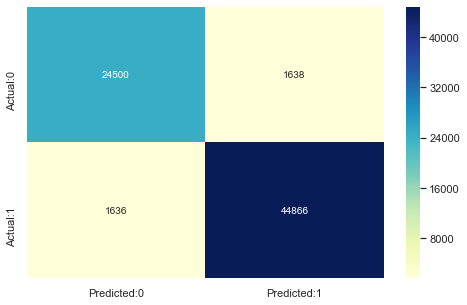

In [132]:
from sklearn.metrics import confusion_matrix
cm=pd.DataFrame(confusion_matrix(ytest,y_pred4),columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

plt.figure(figsize = (8,5))
sns.heatmap(cm, annot=True,fmt='d',cmap="YlGnBu")